# Machine Learning 2 - Advanced Regression Assignment

## Problem Statement:

A housing company based in the US wishes to enter the Australian Housing Market. The company purchases houses at prices below actual value using data analytics. The company then sells them for a profit at a higher price.

The company wishes to identify prospective houses to buy. This analysis is required to build a regression model using regularisation to be able to predict the actual value of the prospective properties and make a decision whetehr or not to invest.

In order to address these goals the company wishes to know two things:

    1. Which variables are significant in predicting the price of a house, and
    2. How well those variables describe the price of a house.

In addition, the analysis is required to determine the optimal value of Lambda for ridge and lasso regression.


### The following describes the major steps in performing the analysis:

    1. Exploratory Data Analysis:
        a. Import the data
        b. Understand the data
        c. Explore the data
        
    2. Data Cleaning
    
    3. Data Preparation for Analysis
    
    4. Model Building:
        a. Build the model
        b. Evaluate the model
        
    5. Observations and Conclusion

In [787]:
# Exploratory Data Analysis Stage

In [788]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics

# Do not display warnings
import warnings
warnings.filterwarnings('ignore')

In [789]:
# Read the Data
data = pd.read_csv('train.csv')
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [790]:
# Check the shape of the data
data.shape

(1460, 81)

In [791]:
# Check the Columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [792]:
# Describe the data
data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [793]:
# Dubplicte Check
sum(data.duplicated(subset = 'Id')) == 0

True

In [794]:
# Check the data for the percentage of null values
round(100*(data.isnull().sum()/len(data.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [795]:
# Next we must check the data for any outliers that may be present
# Any outliers present should then be removed

In [796]:
data.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
90%    1314.100000   120.000000    96.000000   14381.700000     8.000000   
95%    1387.050000   160.000000   107.000000   17401.150000     8.000000   
99%    1445.410000   190.000000   141.000000   37567.640000    10.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
90%       7.000000  2006.000000   2006.000000   335.000000  1065.500000   
95%       8.000000  2007.000000   2007.000000   456.000000  1274.000000   
99%       9.000000  2009.000000   2009.000000   791.920000  1572.410000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
90%     117.200000  1232.000000  1602.200000  1680.000000   954.200000   
95%     396.200000  1468.000000  1753.000000  1831.250000  1141.050000   
99%     830.380000  1797.050000  2155.050000  2219.460000  1418.920000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
90%        0.000000  2158.300000      1.000000      0.000000     2.000000   
95%        0.000000  2466.100000      1.000000      1.000000     2.000000   
99%      360.000000  3123.480000      2.000000      1.000000     3.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%

In [797]:
data.shape

(1460, 81)

In [798]:
# Next we should review the columns that showed percentages of null values
data.columns[data.isnull().any()]
null_columns = data.isnull().sum()/len(data)*100
null_columns = null_columns[null_columns>0]
null_columns.sort_values(inplace = True, ascending = False)
null_columns

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [799]:
# As can be seen from the above displayed column data, there are significant nulls present.
# The data dictionary shows that where there are nulls in these columns it would indicate that
# these facilities are not actually presentin the property and this information could
# affect the price of the property.
# Therefore the categroical variables should have None where the facility is not present.

In [800]:
cat_var_none = ["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for i in cat_var_none:
    data[i].fillna('none', inplace=True)

In [801]:
# Again we should review the remaining columns that showed percentages of null values

data.columns[data.isnull().any()]
null_columns_updated = data.isnull().sum()/len(data)*100
null_columns_updated = null_columns_updated[null_columns_updated>0]
null_columns_updated.sort_values(inplace = True, ascending = False)
null_columns_updated


LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64

In [802]:
# Using some basic statistics we can get a better understanding of these columns

data['LotFrontage'].describe()


count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [803]:
data['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [804]:
data['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [805]:
data['Electrical'].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [806]:
# Next the missing values need to be imputed
# The median vlaues can be used

data['LotFrontage'] = data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
data['GarageYrBlt'].fillna(data['GarageYrBlt'].median(), inplace=True)
data['MasVnrArea'].fillna(data['MasVnrArea'].median(), inplace=True)
data['Electrical'].dropna(inplace=True)


In [807]:
# Now the columns should be chacked again for null values

data['LotFrontage'].describe()

count    1460.000000
mean       70.199658
std        22.431902
min        21.000000
25%        60.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [808]:
data['GarageYrBlt'].describe()

count    1460.000000
mean     1978.589041
std        23.997022
min      1900.000000
25%      1962.000000
50%      1980.000000
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [809]:
data['MasVnrArea'].describe()

count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [810]:
data['Electrical'].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [811]:
len(data.index)/1460

1.0

In [812]:
# As some of the data has been cleaned we can now do
# some exploratory data analysis to understand it better.

In [813]:
# Looking at the numerical data first:

numeric_data = data.select_dtypes(include=['float64', 'int64'])
numeric_data.head()


Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

In [814]:
# The 'Id' column is not required

numeric_data = numeric_data.drop(['Id'], axis=1)
numeric_data.head()


MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'StoneBr'),
  Text(19, 0, 'ClearCr'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

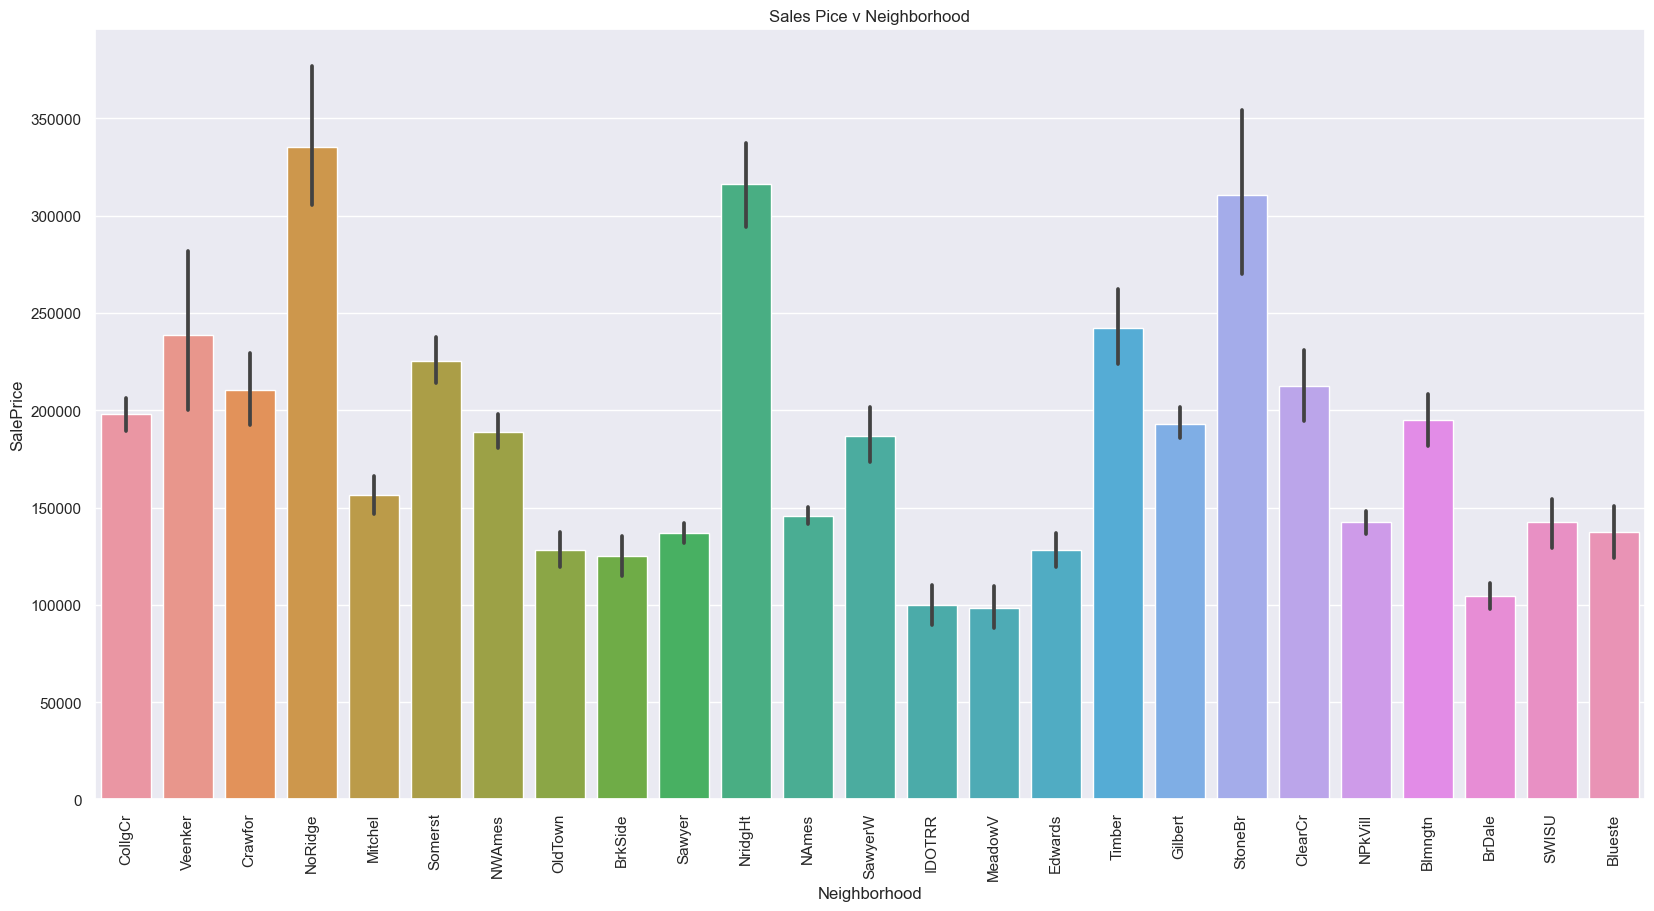

In [815]:
# Now the Sales PRice can be plotted against Neighborhood

plt.figure(figsize=(20,10))
sns.barplot(x='Neighborhood', y='SalePrice', data=data)
plt.title('Sales Pice v Neighborhood')
plt.xticks(rotation=90)


In [816]:
# The most expensive neighborhoods appear to be 'NoRidge', 'Nridght' and 'StoneBr'

In [817]:
# Now let's see 'overall quality' versus 'Sales Price'

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

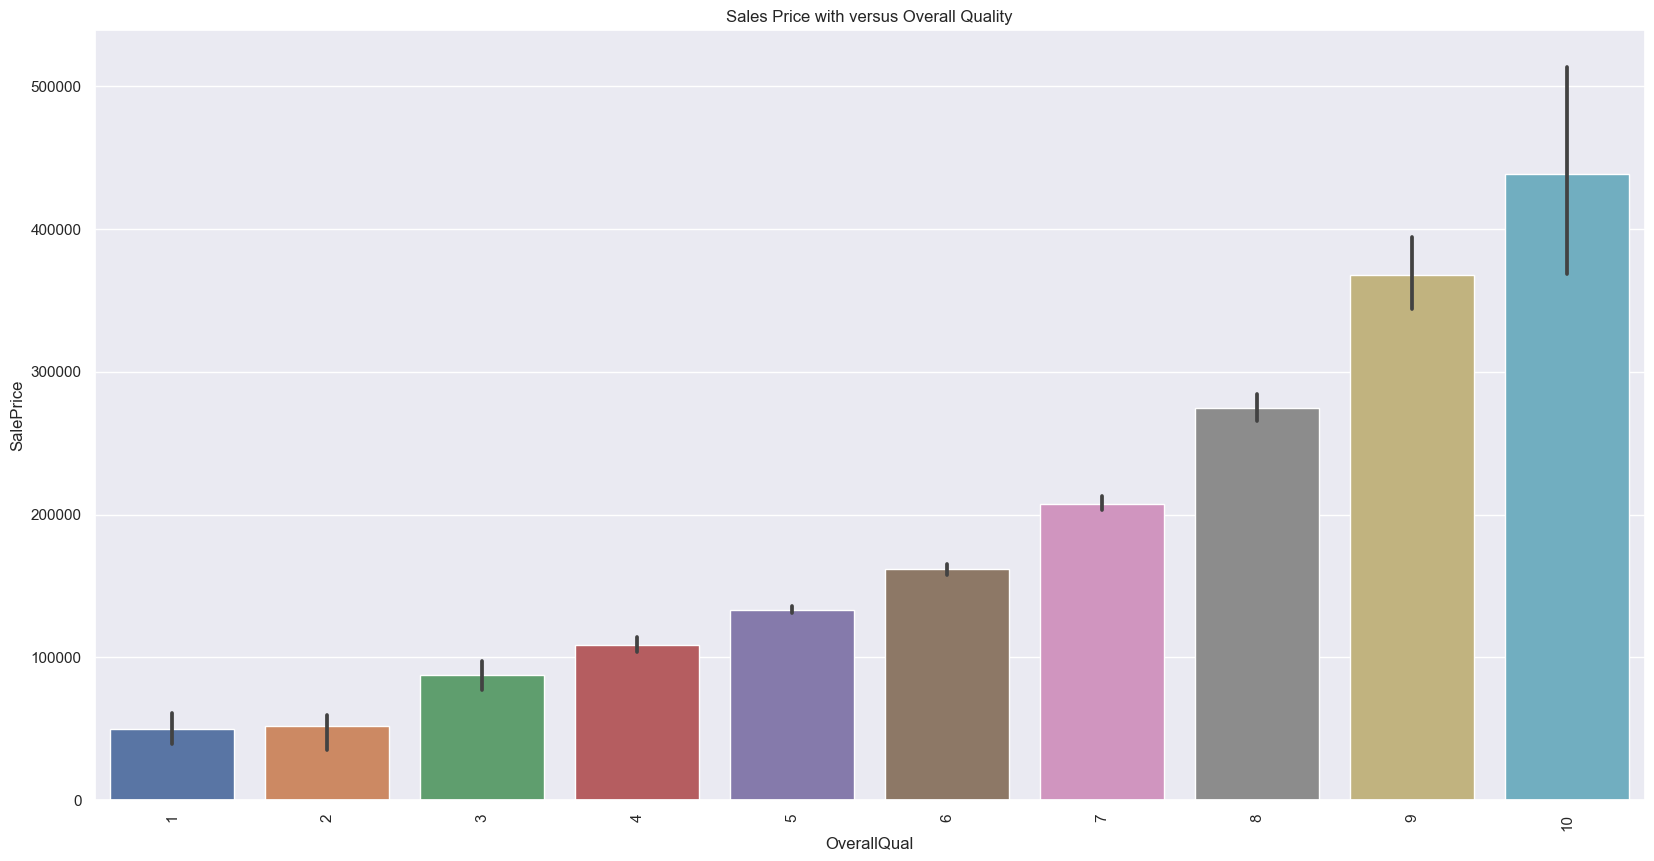

In [818]:
plt.figure(figsize=(20, 10))
sns.barplot(x="OverallQual", y="SalePrice", data= data)
plt.title("Sales Price with versus Overall Quality")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9')])

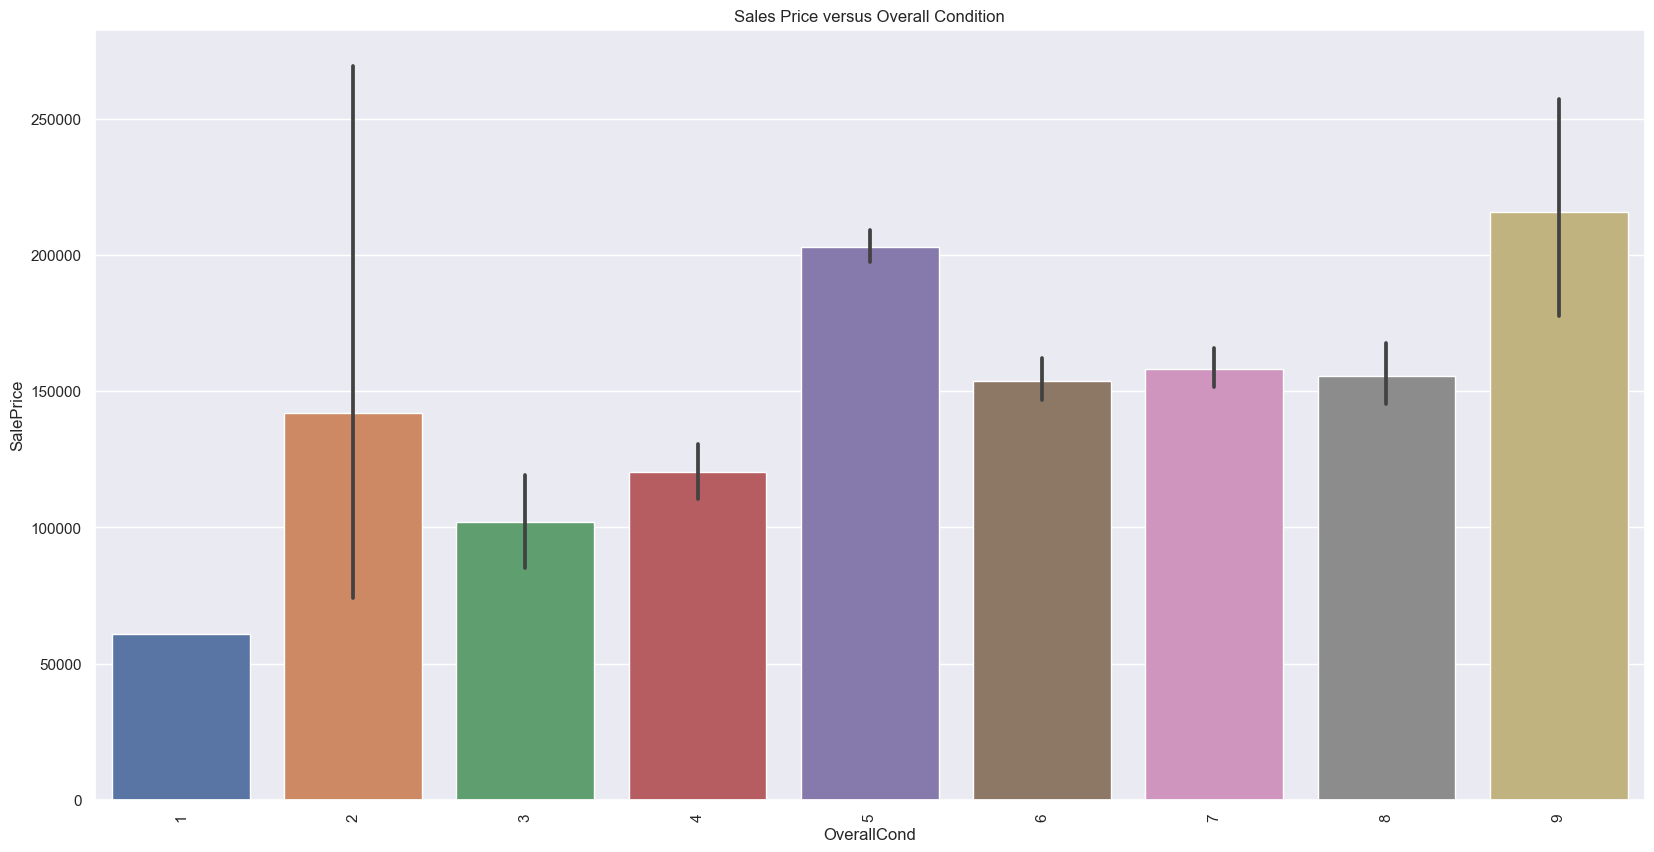

In [819]:
# And we can look at 'SalePrice' versus 'OverallCond'

plt.figure(figsize=(20, 10))
sns.barplot(x="OverallCond", y="SalePrice", data= data)
plt.title("Sales Price versus Overall Condition")
plt.xticks(rotation=90)


In [820]:
# We can see that as overall quality increases so too does the sale price
# The overall condition tends to be improved with higher sale price

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

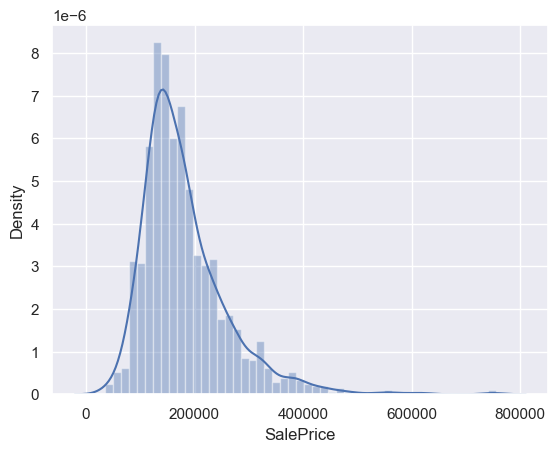

In [821]:
# Plotting a distribution plot of the Sale Price

sns.distplot(data['SalePrice'])


In [822]:
# This plot shows a skewed left distribution
# The data needs to be transformed to be more centralized

In [823]:
data['SalePrice'] = np.log1p(data['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

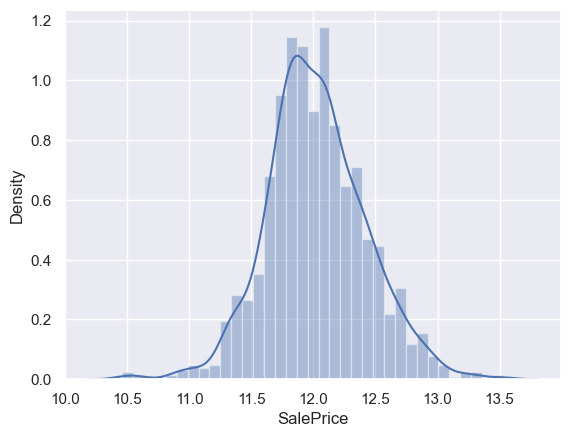

In [824]:
sns.distplot(data['SalePrice'])

In [825]:
# The next step is to examine the correlation matrix to understand the relationship between the variables
corr = numeric_data.corr()
corr

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.370367 -0.139781     0.032628    -0.059316   
LotFrontage     -0.370367     1.000000  0.335957     0.239546    -0.043595   
LotArea         -0.139781     0.335957  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.239546  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.043595 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.120999  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.084550  0.013788     0.550684     0.073741   
MasVnrArea       0.023573     0.195830  0.103321     0.407252    -0.125694   
BsmtFinSF1      -0.069836     0.232576  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649     0.052237  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.119174 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.381038  0.260833     0.537808    -0.171098   
1stFlrSF        -0.251758     0.434109  0.299475     0.476224    -0.144203   
2ndFlrSF         0.307886     0.075686  0.050986     0.295493     0.028942   
LowQualFinSF     0.046474     0.031873  0.004779    -0.030429     0.025494   
GrLivArea        0.074853     0.385190  0.263116     0.593007    -0.079686   
BsmtFullBath     0.003491     0.107226  0.158155     0.111098    -0.054942   
BsmtHalfBath    -0.002333     0.006620  0.048046    -0.040150     0.117821   
FullBath         0.131608     0.186561  0.126031     0.550600    -0.194149   
HalfBath         0.177354     0.054190  0.014259     0.273458    -0.060769   
BedroomAbvGr    -0.023438     0.245232  0.119690     0.101676     0.012980   
KitchenAbvGr     0.281721    -0.005627 -0.017784    -0.183882    -0.087001   
TotRmsAbvGrd     0.040380     0.332619  0.190015     0.427452    -0.057583   
Fireplaces      -0.045569     0.249295  0.271364     0.396765    -0.023820   
GarageYrBlt      0.081396     0.062380 -0.025865     0.514231    -0.306276   
GarageCars      -0.040110     0.281393  0.154871     0.600671    -0.185758   
GarageArea      -0.098672     0.339085  0.180403     0.562022    -0.151521   
WoodDeckSF      -0.012579     0.088736  0.171698     0.238923    -0.003334   
OpenPorchSF     -0.006100     0.141734  0.084774     0.308819    -0.032589   
EnclosedPorch   -0.012037     0.008057 -0.018340    -0.113937     0.070356   
3SsnPorch       -0.043825     0.064654  0.020423     0.030371     0.025504   
ScreenPorch     -0.026030     0.041063  0.043160     0.064886     0.054811   
PoolArea         0.008283     0.174567  0.077672     0.065166    -0.001985   
MiscVal         -0.007683     0.005332  0.038068    -0.031406     0.068777   
MoSold          -0.013585     0.007370  0.001205     0.070815    -0.003511   
YrSold          -0.021407     0.004756 -0.014261    -0.027347     0.043950   
SalePrice       -0.084284     0.349876  0.263843     0.790982    -0.077856   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.027850      0.040581    0.023573   -0.069836   -0.065649   
LotFrontage     0.120999      0.084550    0.195830    0.232576    0.052237   
LotArea         0.014228      0.013788    0.103321    0.214103    0.111170   
OverallQual     0.572323      0.550684    0.407252    0.239666   -0.059119   
OverallCond    -0.375983      0.073741   -0.125694   -0.046231    0.040229   
YearBuilt       1.000000      0.592855    0.311600    0.249503   -0.049107   
YearRemodAdd    0.592855      1.000000    0.176529    0.128451   -0.067759   
MasVnrArea      0.311600      0.176529    1.000000    0.261256   -0.071330   
BsmtFinSF1      0.249503      0.128451    0.261256    1.000000   -0.050117   
BsmtFinSF2     -0.049107     -0.067759   -0.071330   -0.050117    1.000000   
BsmtUnfSF       0.149040      0.181133    0.113862   -0.495251   -0.209294   
TotalBsmtSF     0.391452      0.291066    0.360067    0.522396    0.104810   
1stFlrSF        0.281986      0.2403

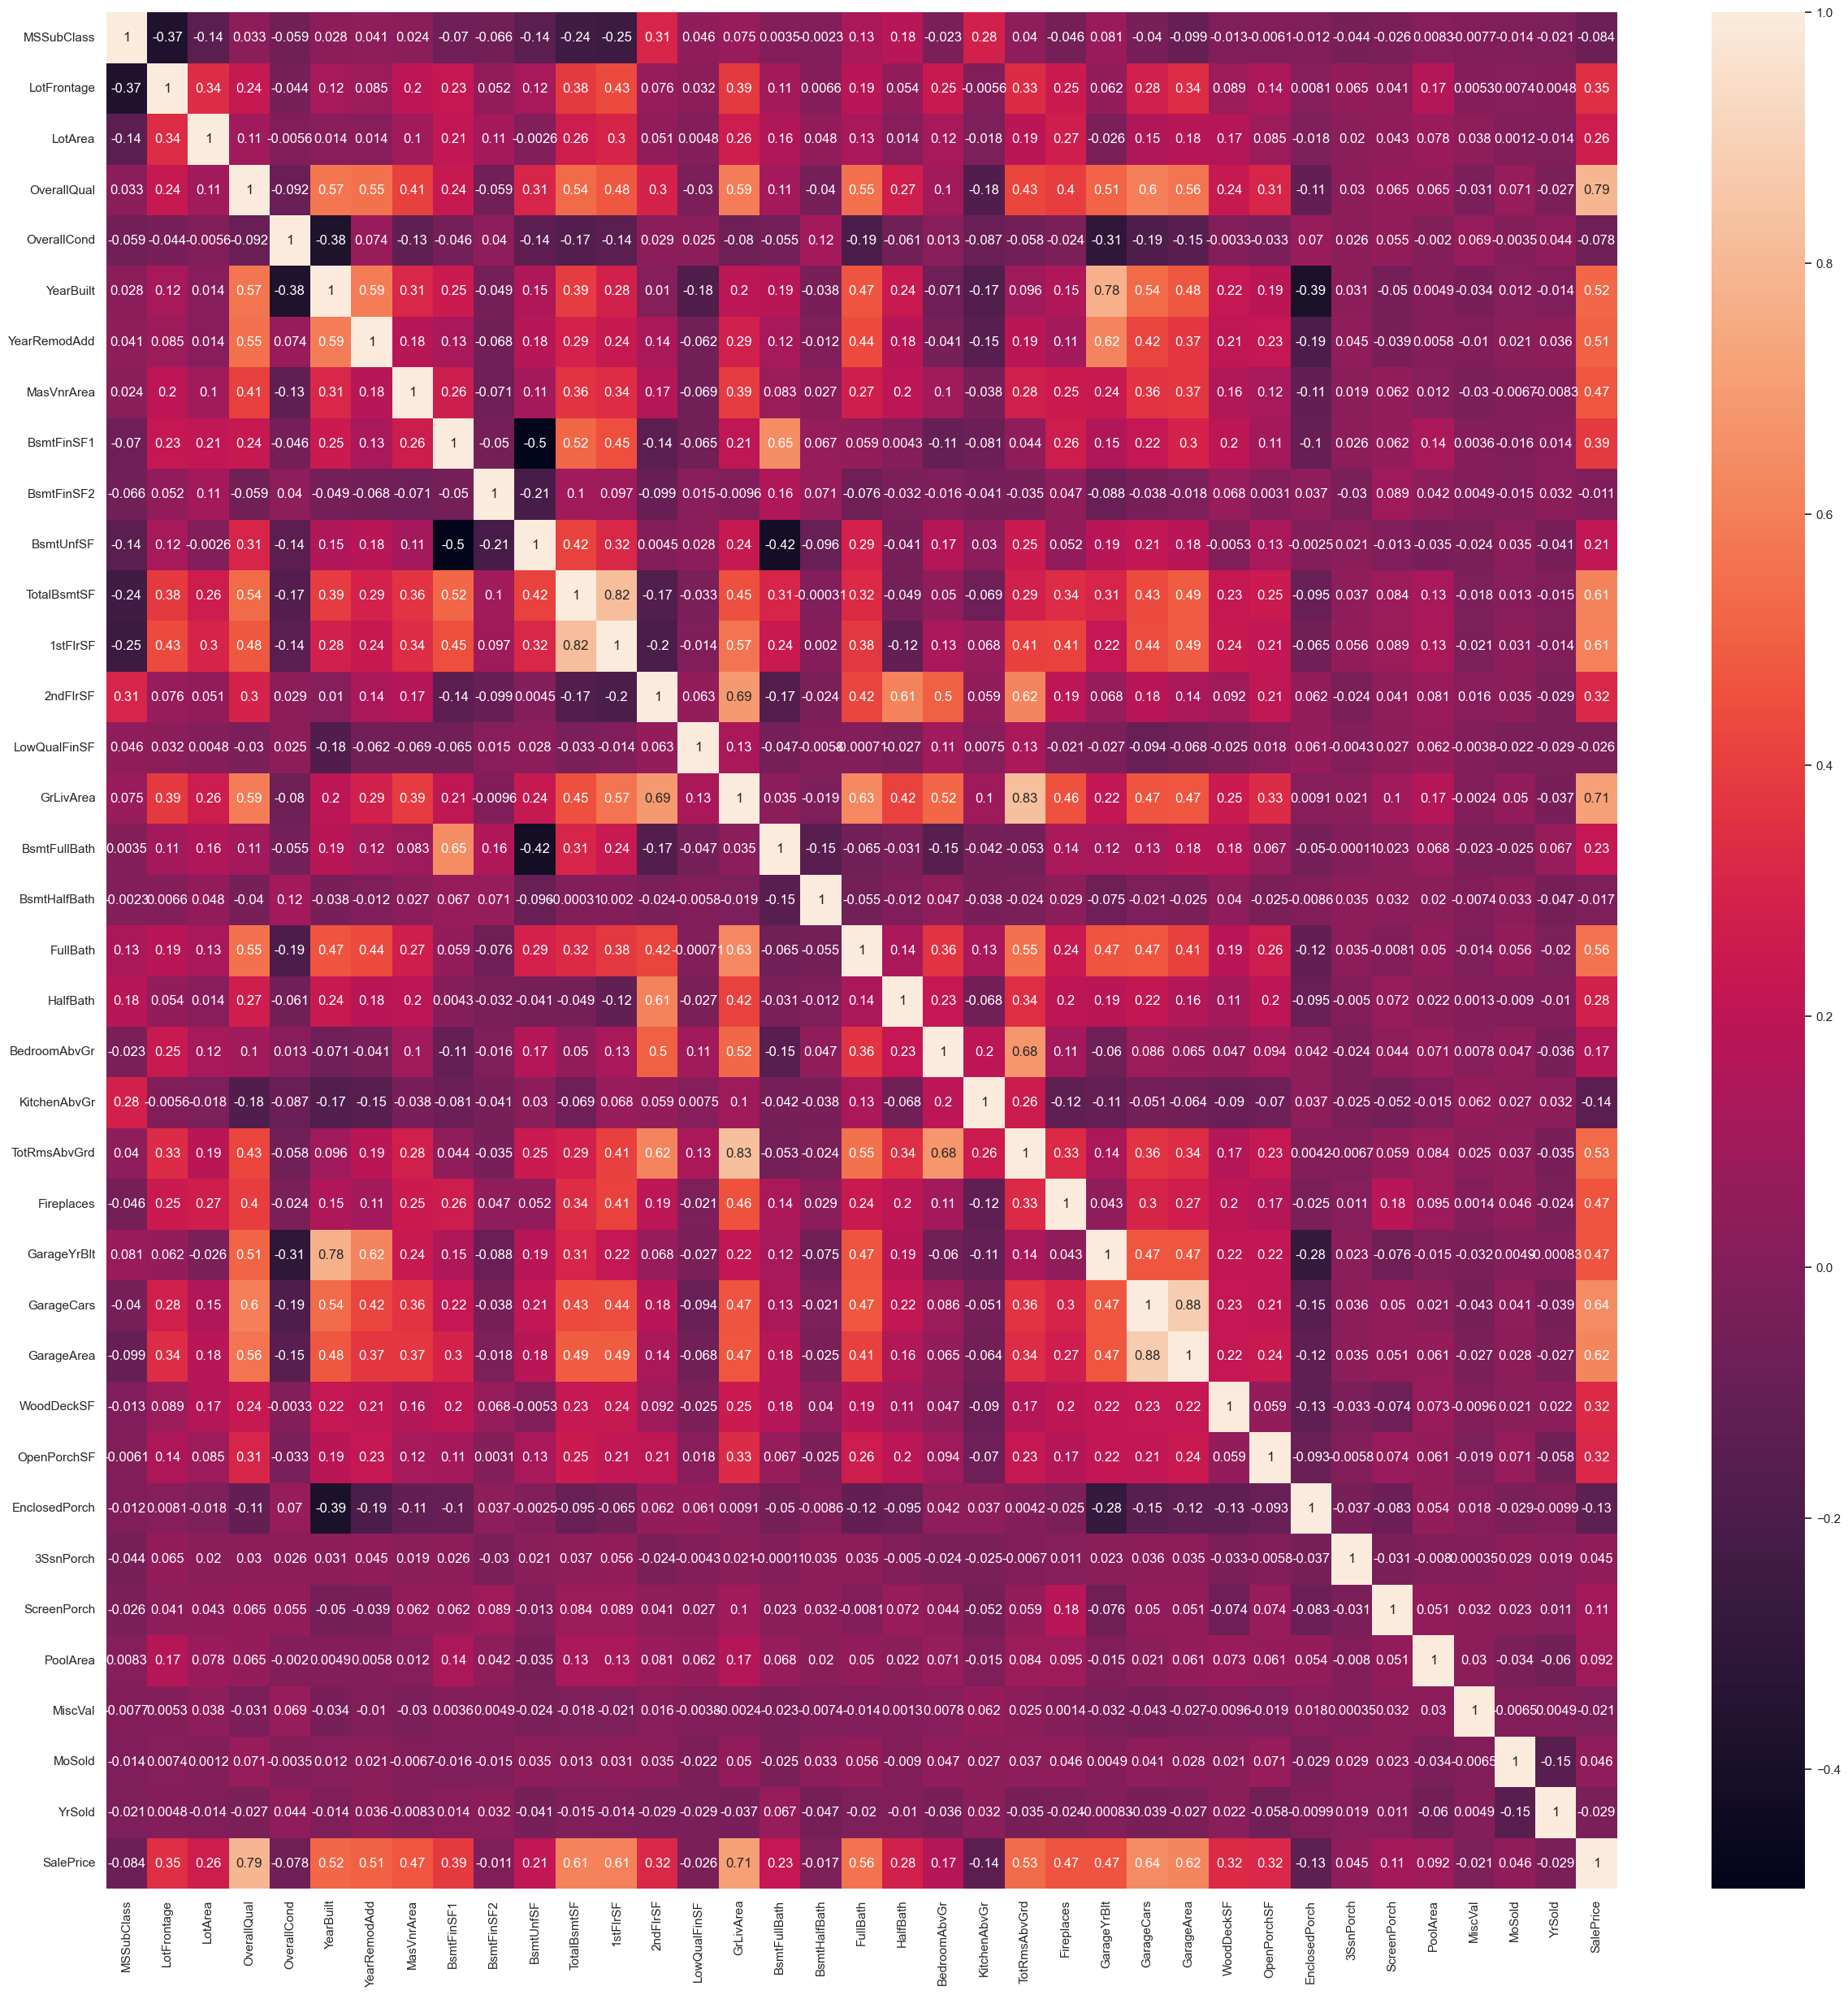

In [826]:
# The baove data should be shown on a heat map for better understanding
plt.figure(figsize=(30,30))
sns.heatmap(corr, annot=True)
plt.show()

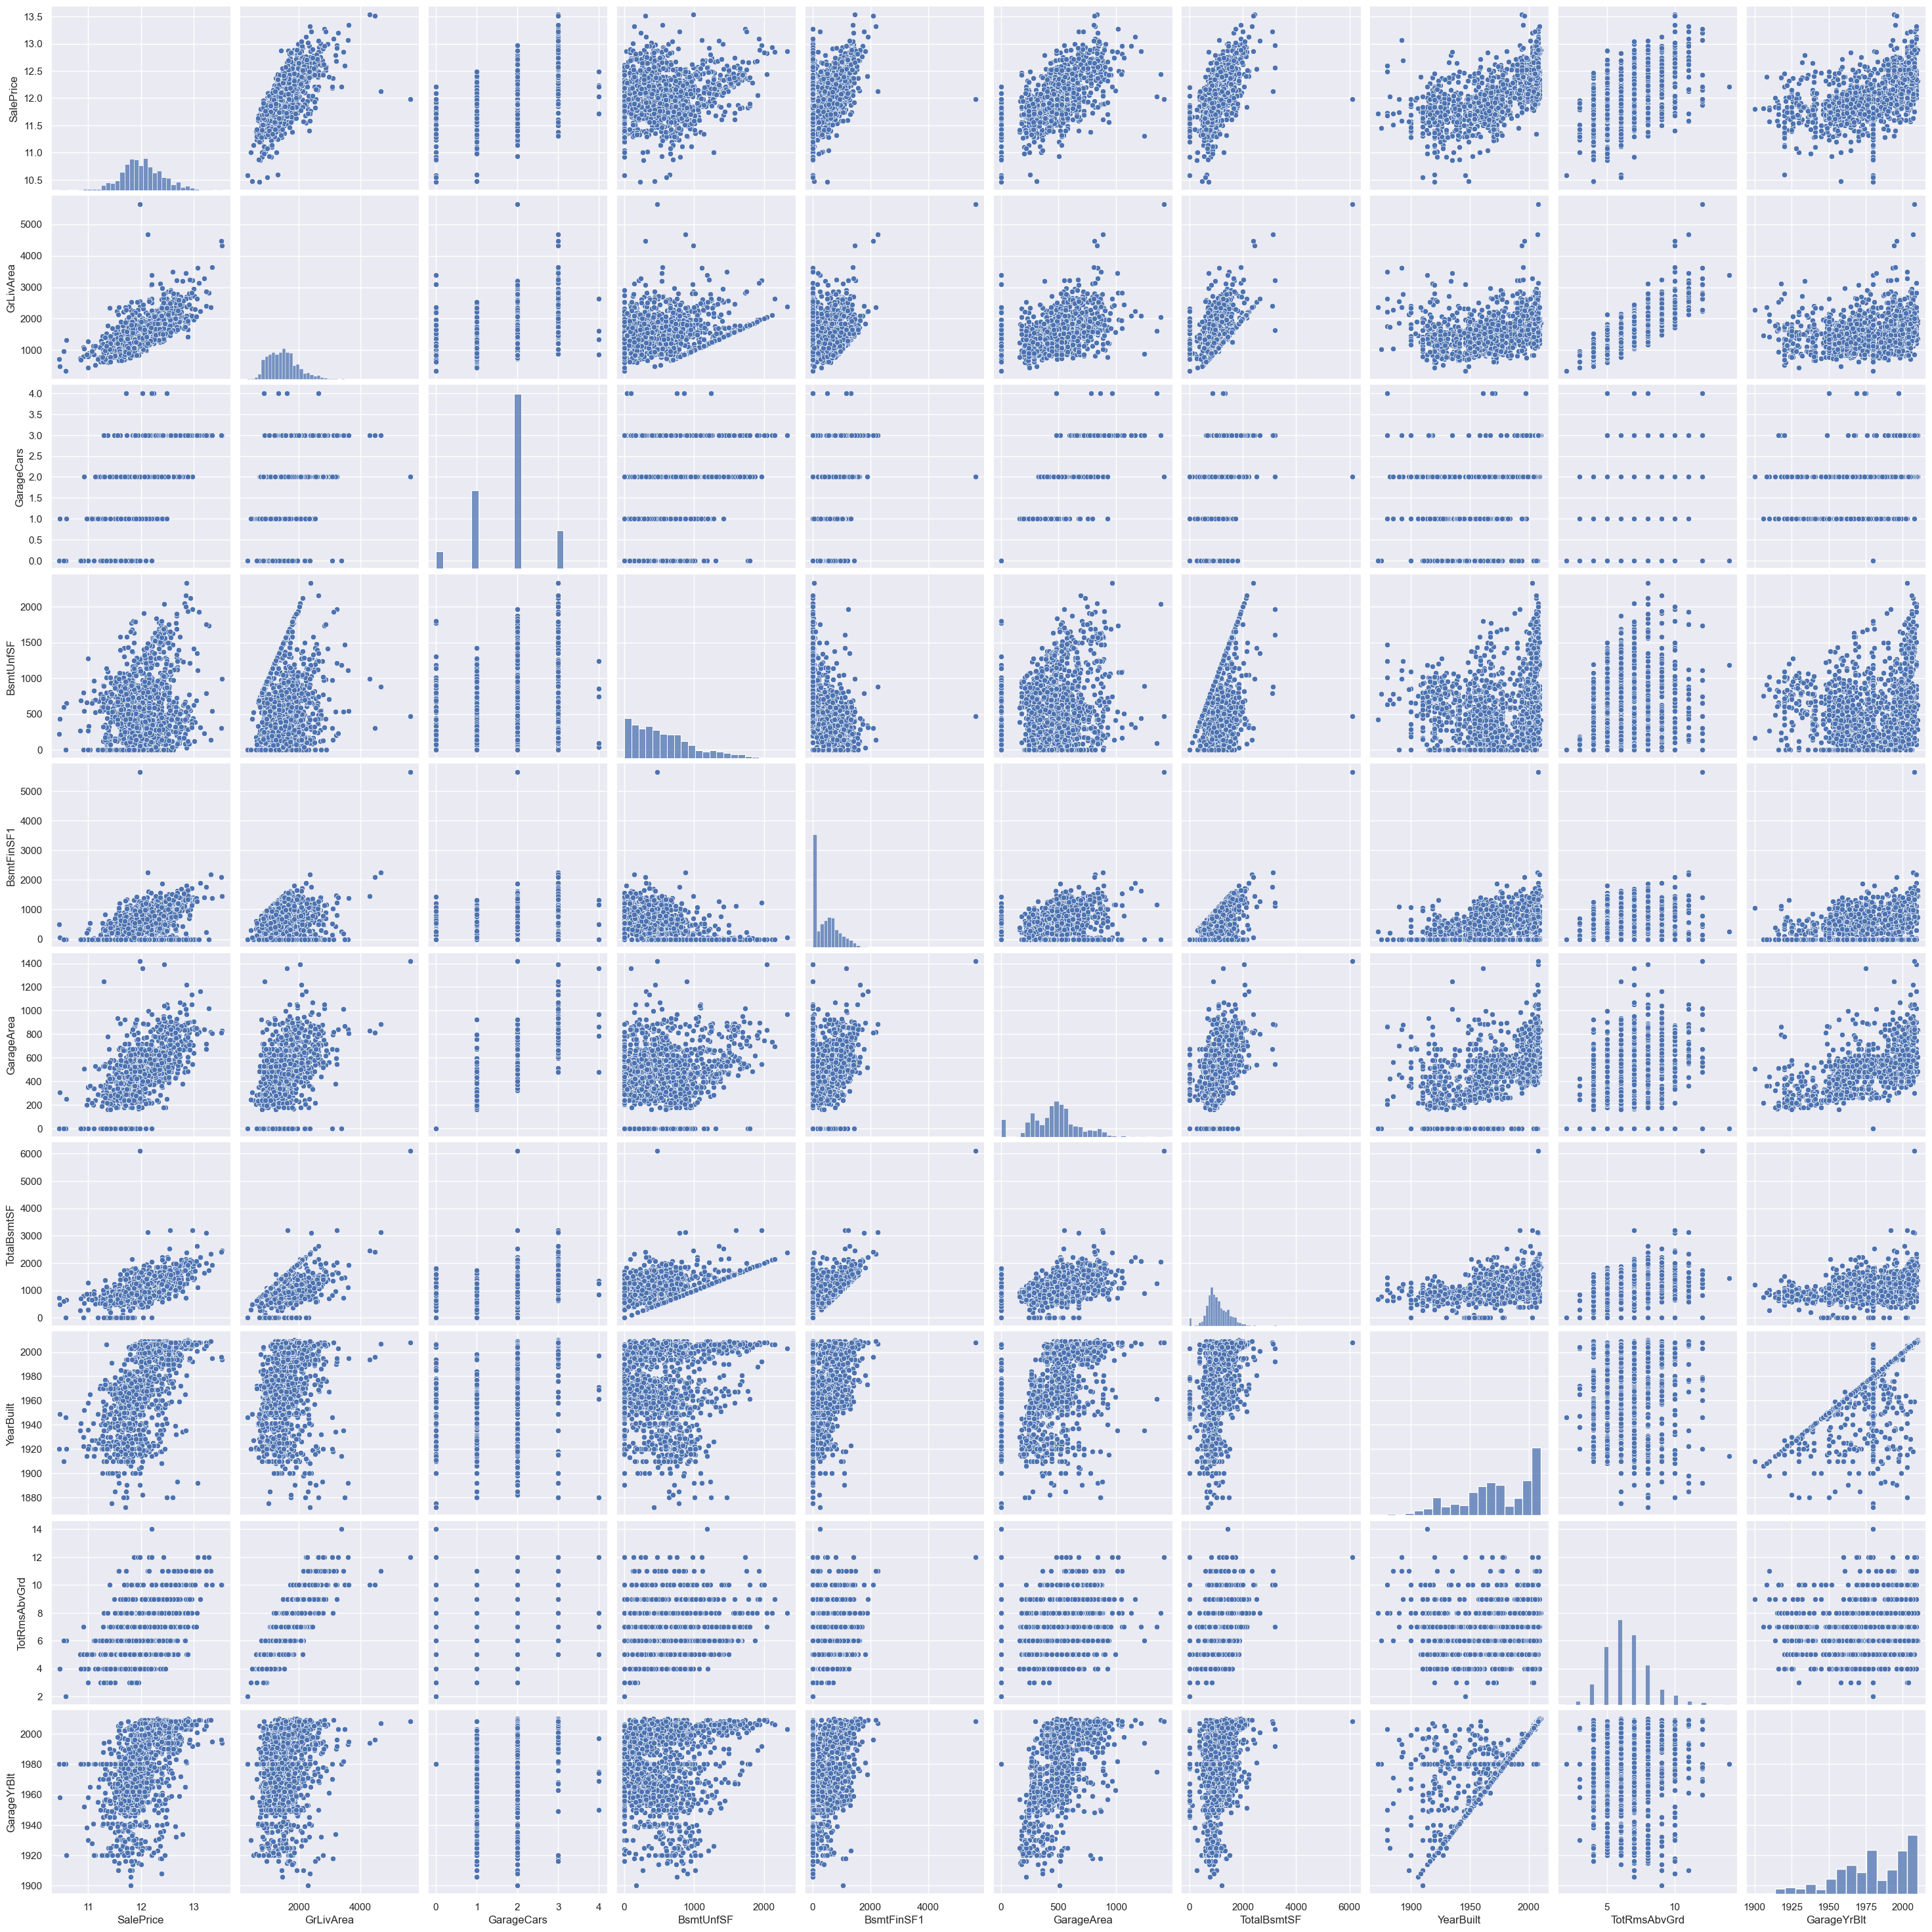

In [827]:
# While there appears to be some variables that are correlated, tese should be dropped
# if they are not having any impact on the Sales Price
# A pair plot will help identify the ability of a variable to predict Sale Price
sns.set()
columns = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(data[columns], size=3)
plt.show()

In [828]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [829]:
# As can be seen from the above pairplot, certain variables show a minimal
# contribution to predicting Sale PRice and therefore these variables (columns)
# can be dropped from the data as follows:
# GarageCars, BsmtUnfSf, TotRmsAbvGrd & GarageYrBlt

data = data.drop(['GarageCars'], axis = 1)
data = data.drop(['BsmtUnfSF'], axis = 1)
data = data.drop(['TotRmsAbvGrd'], axis = 1)
data = data.drop(['GarageYrBlt'], axis = 1)  

data.head()


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  none      Reg   
1   2          20       RL         80.0     9600   Pave  none      Reg   
2   3          60       RL         68.0    11250   Pave  none      IR1   
3   4          70       RL         60.0     9550   Pave  none      IR1   
4   5          60       RL         84.0    14260   Pave  none      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  TotalBsmtSF Heating  \
0          GLQ         706          Unf           0          856    GasA   
1          ALQ         978          Unf           0         1262    GasA   
2          GLQ         486          Unf           0          920    GasA   
3          ALQ         216          Unf           0          756    GasA   
4          GLQ         655          Unf           0         1145    GasA   

  HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        Ex          Y      SBrkr       856       854             0   
1        Ex          Y      SBrkr      1262         0             0   
2        Ex          Y      SBrkr       920       866             0   
3        Gd          Y      SBrkr       961       756             0   
4        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual Functional  Fireplaces FireplaceQu GarageType  \
0             1          Gd        Typ           0        none     Attchd   
1             1          TA        Typ           1          TA     Attchd   
2             1          Gd        Typ           1          TA     Attchd   
3             1          Gd        Typ           1          Gd     Detchd   
4             1          Gd        Typ  

In [830]:
# Next we can examine the columns containing numerical data
data.select_dtypes(exclude=['object'])

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
0          2003          2003       196.0         706           0   
1          1976          1976         0.0         978           0   
2          2001          2002       162.0         486           0   
3          1915          1970         0.0         216           0   
4          2000          2000       350.0         655           0   
...         ...           ...         ...         ...         ...   
1455       1999          2000         0.0           0           0   
1456       1978          1988       119.0         790         163   
1457       1941          2006         0.0         275           0   
1458       1950          1996         0.0          49        1029   
1459       1965          1965         0.0         830         290   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0             856       856       854             0       1710             1   
1            1262      1262         0             0       1262             0   
2             920       920       866             0       1786             1   
3             756       961       756             0       1717             1   
4            1145      1145      1053             0       2198             1   
...           ...       ...       ...           ...        ...           ...   
1455          953       953       694             0       1647             0   
1456         1542      2073         0             0       2073             1   
1457         1152      1188      1152             0       2340             0   
1458         1078      1078         0             0       1078             1   
1459         1256      1256         0             0       1256             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0         2         1             3             1   
1                1         2         0             3             1   
2                0         2         1             3             1   
3                0         1         0             3             1   
4                0         2         1             4             1   
...            ...       ...       ...           ...           ...   
1455             0         2         1             3             1   
1456             0         2         0             3             1   
1457             0         2         0             4             1   
1458             0         1         0             2             1   
1459             0         1         1             3             1   

      Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0              0         548           0           61              0   
1              1         460         298            0              0   
2              1         608           0           42              0   
3              1         642           0           35            272   
4              1         836         192           84              0   
...          ...         ...         ...          ...   

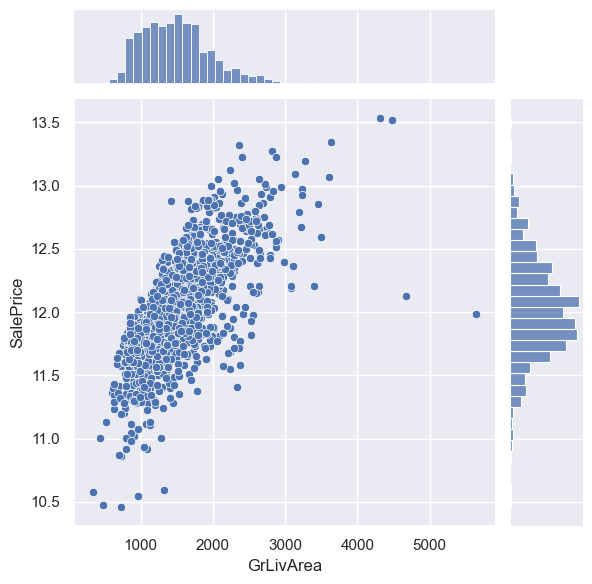

In [831]:
# Comparing Ground Living Area with Sale Price
sns.jointplot(x='GrLivArea', y='SalePrice', data=data)
plt.show()

In [832]:
# To remove the outliers we must create a function using the percentiles

def outlier_removal(x,y):
    quant1 = x[y].quantile(0.25)
    quant3 = x[y].quantile(0.75)
    difference = quant3 - quant1
    value_lower = quant1 - (difference)*1.5
    value_upper = quant3 + (difference)*1.5
    outliers = x[(x[y]<value_upper) & (x[y]>value_lower)]
    return outliers

In [833]:
# There are obviously outliers present in the data. These outliers should be removed
data = outlier_removal(data, 'GrLivArea')

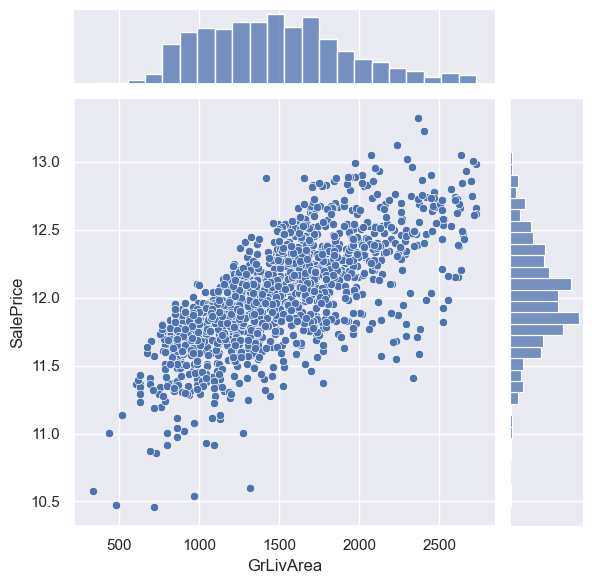

In [834]:
sns.jointplot(x='GrLivArea', y='SalePrice', data=data)
plt.show()

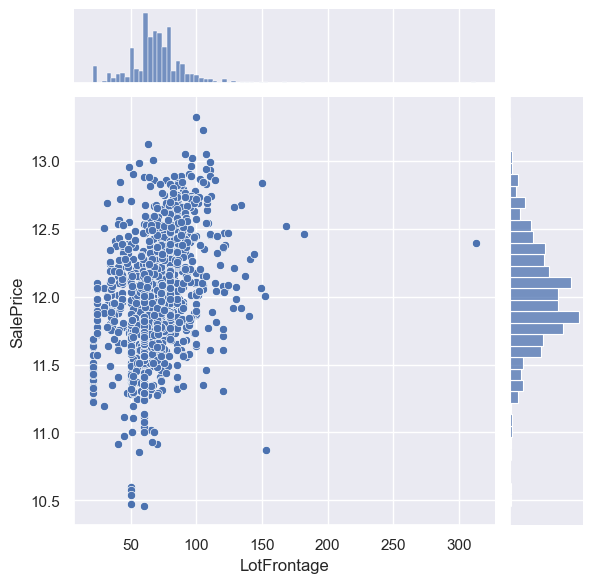

In [835]:
sns.jointplot(x='LotFrontage', y='SalePrice', data=data)
plt.show()

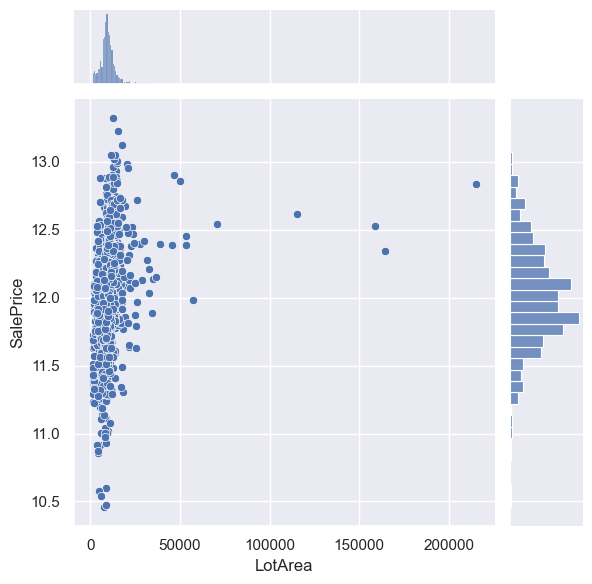

In [836]:
sns.jointplot(x='LotArea', y='SalePrice', data=data)
plt.show()

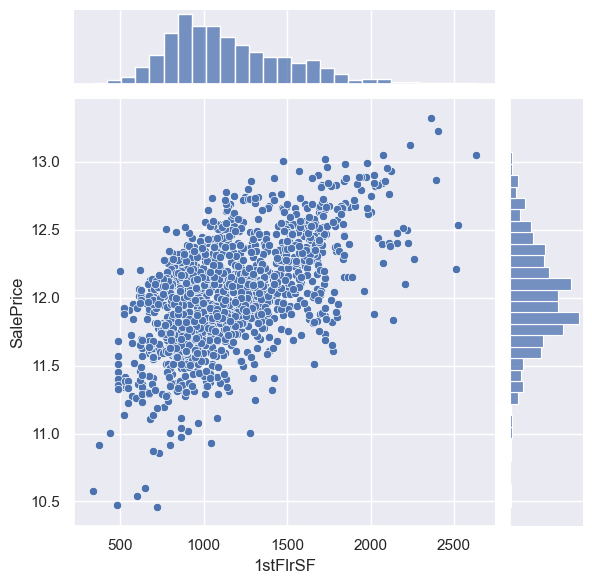

In [837]:
sns.jointplot(x='1stFlrSF', y='SalePrice', data=data)
plt.show()

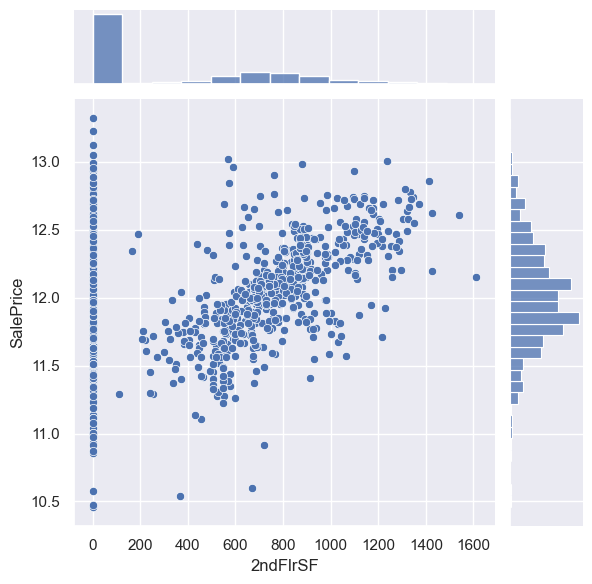

In [838]:
sns.jointplot(x='2ndFlrSF', y='SalePrice', data=data)
plt.show()

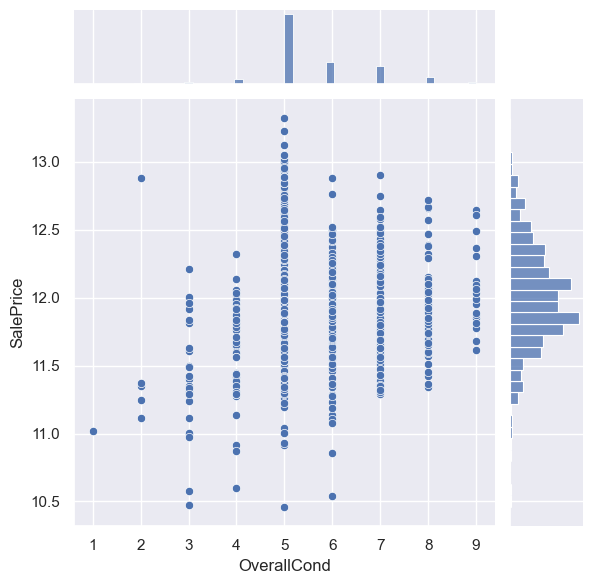

In [839]:
sns.jointplot(x='OverallCond', y='SalePrice', data=data)
plt.show()

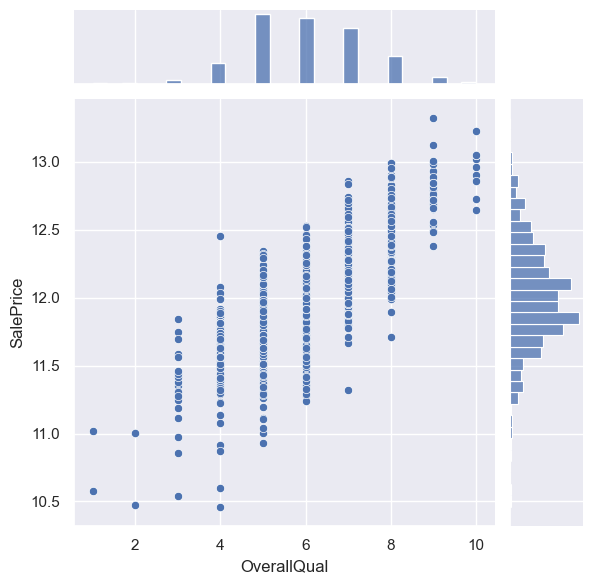

In [840]:
sns.jointplot(x='OverallQual', y='SalePrice', data=data)
plt.show()

In [841]:
# We can see from the above plots that there is a positive correlation
# between Ground Living Area, Lot Frontage, 2nd Floor SF, overall condition and overall quality
# with an increase in sale price.

In [842]:
# To understand the age of the property we need to create a new variable
# By subtracting the year it was built from the year it was sold:
# We can call this variable age_property

data['age_property'] = (data['YrSold'] - data['YearBuilt'])
data.head()


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  none      Reg   
1   2          20       RL         80.0     9600   Pave  none      Reg   
2   3          60       RL         68.0    11250   Pave  none      IR1   
3   4          70       RL         60.0     9550   Pave  none      IR1   
4   5          60       RL         84.0    14260   Pave  none      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  TotalBsmtSF Heating  \
0          GLQ         706          Unf           0          856    GasA   
1          ALQ         978          Unf           0         1262    GasA   
2          GLQ         486          Unf           0          920    GasA   
3          ALQ         216          Unf           0          756    GasA   
4          GLQ         655          Unf           0         1145    GasA   

  HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        Ex          Y      SBrkr       856       854             0   
1        Ex          Y      SBrkr      1262         0             0   
2        Ex          Y      SBrkr       920       866             0   
3        Gd          Y      SBrkr       961       756             0   
4        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual Functional  Fireplaces FireplaceQu GarageType  \
0             1          Gd        Typ           0        none     Attchd   
1             1          TA        Typ           1          TA     Attchd   
2             1          Gd        Typ           1          TA     Attchd   
3             1          Gd        Typ           1          Gd     Detchd   
4             1          Gd        Typ  

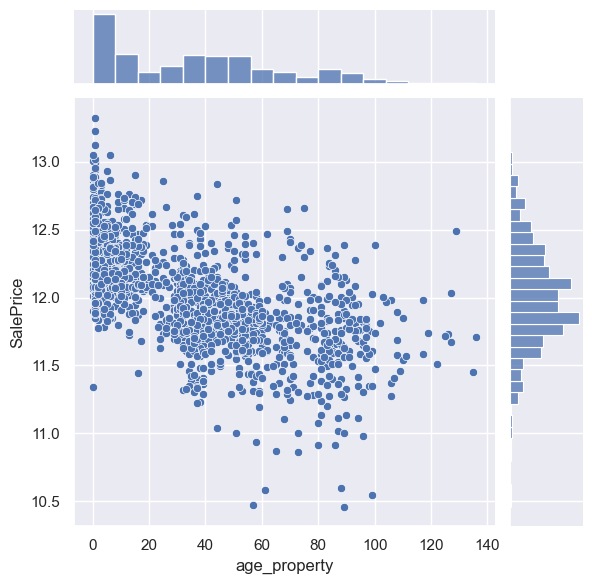

In [843]:
# Next we can plot the age of the property against the Sale Price

sns.jointplot(x='age_property', y='SalePrice', data=data)
plt.show()


In [844]:
# From the above plot we can see that as in general as the age of the property increases
# the sale price has a tendancy to fall.

In [845]:
# At this stage as we do not require the columns of Month Sold, Year Sold, Year Built and Year Remodelled 
# and so these can be dropped form the data frame.

data = data.drop(['MoSold'], axis = 1)
data = data.drop(['YrSold'], axis = 1)
data = data.drop(['YearBuilt'], axis = 1)
data = data.drop(['YearRemodAdd'], axis = 1)
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  none      Reg   
1   2          20       RL         80.0     9600   Pave  none      Reg   
2   3          60       RL         68.0    11250   Pave  none      IR1   
3   4          70       RL         60.0     9550   Pave  none      IR1   
4   5          60       RL         84.0    14260   Pave  none      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl  \
0       Norm     1Fam     2Story            7            5     Gable  CompShg   
1       Norm     1Fam     1Story            6            8     Gable  CompShg   
2       Norm     1Fam     2Story            7            5     Gable  CompShg   
3       Norm     1Fam     2Story            7            5     Gable  CompShg   
4       Norm     1Fam     2Story            8            5     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1     MetalSd     MetalSd       None         0.0        TA        TA   
2     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  TotalBsmtSF Heating HeatingQC CentralAir  \
0          Unf           0          856    GasA        Ex          Y   
1          Unf           0         1262    GasA        Ex          Y   
2          Unf           0          920    GasA        Ex          Y   
3          Unf           0          756    GasA        Gd          Y   
4          Unf           0         1145    GasA        Ex          Y   

  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0      SBrkr       856       854             0       1710             1   
1      SBrkr      1262         0             0       1262             0   
2      SBrkr       920       866             0       1786             1   
3      SBrkr       961       756             0       1717             1   
4      SBrkr      1145      1053             0       2198             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
0             0         2         1             3             1          Gd   
1             1         2         0             3             1          TA   
2             0         2         1             3             1          Gd   
3             0         1         0             3             1          Gd   
4             0         2         1             4             1          Gd   

  Functional  Fireplaces FireplaceQu GarageType GarageFinish  GarageArea  \
0        Typ           0        none     Attchd          RFn         548   
1        Typ           1          TA     Attchd          RFn         460   
2        Typ           1          TA     Attchd          RFn         608   
3        Typ           1          Gd     Detchd          Unf         642   
4        Typ           1          TA   

In [846]:
# Columns with low variance can be dropped

data = data.drop(['Street'], axis=1)
data=data.drop(['Utilities'], axis=1)


In [847]:
# Now we should check the variance of the numerical columns
num_var = data.select_dtypes(include=['float64', 'int64'])
num_var

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
0          196.0         706           0          856       856       854   
1            0.0         978           0         1262      1262         0   
2          162.0         486           0          920       920       866   
3            0.0         216           0          756       961       756   
4          350.0         655           0         1145      1145      1053   
...          ...         ...         ...          ...       ...       ...   
1455         0.0           0           0          953       953       694   
1456       119.0         790         163         1542      2073         0   
1457         0.0         275           0         1152      1188      1152   
1458         0.0          49        1029         1078      1078         0   
1459         0.0         830         290         1256      1256         0   

      LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0                0       1710             1             0         2         1   
1                0       1262             0             1         2         0   
2                0       1786             1             0         2         1   
3                0       1717             1             0         1         0   
4                0       2198             1             0         2         1   
...            ...        ...           ...           ...       ...       ...   
1455             0       1647             0             0         2         1   
1456             0       2073             1             0         2         0   
1457             0       2340             0             0         2         0   
1458             0       1078             1             0         1         0   
1459             0       1256             1             0         1         1   

      BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  \
0                3             1           0         548           0   
1                3             1           1         460         298   
2                3             1           1         608           0   
3                3             1           1         642           0   
4                4             1           1         836         192   
...            ...           ...         ...         ...         ...   
1455             3             1           1         460           0   
1456             3             1           2         500         349   
1457             4             1           2         252           0   
1458             2             1           0         240         366   
1459             3             1           0         276         736   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0              61              0          0            0         0        0   
1               0              0          0            0         0        0   
2              42              0          0            0         0        0   
3              35            272        

In [848]:
for i in num_var:
    print(data[i].value_counts())

1       1
956     1
977     1
976     1
975     1
       ..
482     1
481     1
480     1
479     1
1460    1
Name: Id, Length: 1429, dtype: int64
20     534
60     283
50     139
120     87
30      69
160     63
70      59
80      57
90      52
190     29
85      20
45      12
75      11
180     10
40       4
Name: MSSubClass, dtype: int64
60.0     150
80.0     110
70.0      94
65.0      74
73.0      70
        ... 
33.0       1
150.0      1
38.0       1
111.0      1
46.0       1
Name: LotFrontage, Length: 112, dtype: int64
7200     25
9600     24
6000     17
8400     14
9000     14
         ..
10637     1
16033     1
11846     1
2500      1
9717      1
Name: LotArea, Length: 1047, dtype: int64
5     396
6     371
7     314
8     157
4     116
9      40
3      20
10     10
2       3
1       2
Name: OverallQual, dtype: int64
5    804
6    248
7    201
8     72
4     56
3     24
9     18
2      5
1      1
Name: OverallCond, dtype: int64
0.0      856
72.0       8
108.0      8
180.0      

In [849]:
# Dropping columns with large amounts of null data:

data = data.drop(['MiscVal', 'RoofMatl', 'Heating', 'Fence', 'Functional', 'PoolQC', 'Alley', 'Condition2', 'GarageCond'], axis=1)


In [850]:
data.shape

(1429, 63)

# 3. Data Preparation for Analysis

In [851]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
0   1          60       RL         65.0     8450      Reg         Lvl   
1   2          20       RL         80.0     9600      Reg         Lvl   
2   3          60       RL         68.0    11250      IR1         Lvl   
3   4          70       RL         60.0     9550      IR1         Lvl   
4   5          60       RL         84.0    14260      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm     1Fam     2Story   
3    Corner       Gtl      Crawfor       Norm     1Fam     2Story   
4       FR2       Gtl      NoRidge       Norm     1Fam     2Story   

   OverallQual  OverallCond RoofStyle Exterior1st Exterior2nd MasVnrType  \
0            7            5     Gable     VinylSd     VinylSd    BrkFace   
1            6            8     Gable     MetalSd     MetalSd       None   
2            7            5     Gable     VinylSd     VinylSd    BrkFace   
3            7            5     Gable     Wd Sdng     Wd Shng       None   
4            8            5     Gable     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  TotalBsmtSF HeatingQC  \
0          GLQ         706          Unf           0          856        Ex   
1          ALQ         978          Unf           0         1262        Ex   
2          GLQ         486          Unf           0          920        Ex   
3          ALQ         216          Unf           0          756        Gd   
4          GLQ         655          Unf           0         1145        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  Fireplaces FireplaceQu GarageType GarageFinish  GarageArea  \
0          Gd           0        none     Attchd          RFn         548   
1          TA           1          TA     Attchd          RFn         460   
2          Gd           1          TA     Attchd          RFn         608   
3          Gd           1          Gd     Detchd          Unf         642   
4          Gd           1          TA     Attchd          RFn         836   

  GarageQual PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0         TA          Y           0           61              0          0   
1         TA          Y         298            0              0          0   
2         TA          Y           0           42              0          0   
3         TA          Y           0           35     

In [852]:
# We do not need the Id column

data = data.drop(['Id'], axis=1)
data.head()


MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
0          60       RL         65.0     8450      Reg         Lvl    Inside   
1          20       RL         80.0     9600      Reg         Lvl       FR2   
2          60       RL         68.0    11250      IR1         Lvl    Inside   
3          70       RL         60.0     9550      IR1         Lvl    Corner   
4          60       RL         84.0    14260      IR1         Lvl       FR2   

  LandSlope Neighborhood Condition1 BldgType HouseStyle  OverallQual  \
0       Gtl      CollgCr       Norm     1Fam     2Story            7   
1       Gtl      Veenker      Feedr     1Fam     1Story            6   
2       Gtl      CollgCr       Norm     1Fam     2Story            7   
3       Gtl      Crawfor       Norm     1Fam     2Story            7   
4       Gtl      NoRidge       Norm     1Fam     2Story            8   

   OverallCond RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
0            5     Gable     VinylSd     VinylSd    BrkFace       196.0   
1            8     Gable     MetalSd     MetalSd       None         0.0   
2            5     Gable     VinylSd     VinylSd    BrkFace       162.0   
3            5     Gable     Wd Sdng     Wd Shng       None         0.0   
4            5     Gable     VinylSd     VinylSd    BrkFace       350.0   

  ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0        Gd        TA      PConc       Gd       TA           No          GLQ   
1        TA        TA     CBlock       Gd       TA           Gd          ALQ   
2        Gd        TA      PConc       Gd       TA           Mn          GLQ   
3        TA        TA     BrkTil       TA       Gd           No          ALQ   
4        Gd        TA      PConc       Gd       TA           Av          GLQ   

   BsmtFinSF1 BsmtFinType2  BsmtFinSF2  TotalBsmtSF HeatingQC CentralAir  \
0         706          Unf           0          856        Ex          Y   
1         978          Unf           0         1262        Ex          Y   
2         486          Unf           0          920        Ex          Y   
3         216          Unf           0          756        Gd          Y   
4         655          Unf           0         1145        Ex          Y   

  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0      SBrkr       856       854             0       1710             1   
1      SBrkr      1262         0             0       1262             0   
2      SBrkr       920       866             0       1786             1   
3      SBrkr       961       756             0       1717             1   
4      SBrkr      1145      1053             0       2198             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
0             0         2         1             3             1          Gd   
1             1         2         0             3             1          TA   
2             0         2         1             3             1          Gd   
3             0         1         0             3             1          Gd   
4             0         2         1             4             1          Gd   

   Fireplaces FireplaceQu GarageType GarageFinish  GarageArea GarageQual  \
0           0        none     Attchd          RFn         548         TA   
1           1          TA     Attchd          RFn         460         TA   
2           1          TA     Attchd          RFn         608         TA   
3           1          Gd     Detchd          Unf         642         TA   
4           1          TA     Attchd          RFn         836         TA   

  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0          Y           0           61              0          0            0   
1          Y         298            0              0          0            0   
2          Y           0           42              0          0            0   
3  

In [853]:
# Next we should examine the data types remaining

data_types = data.dtypes
numerical_types = data_types[(data_types == 'int64') | (data_types == float)] 
categorical_types = data_types[data_types == object]


In [854]:
# Check the amounts of each data type:

pd.DataFrame(data_types).reset_index().set_index(0).reset_index()[0].value_counts()


object     33
int64      26
float64     3
Name: 0, dtype: int64

In [855]:
# The next stage is to create dummy variables (columns)
# So that the categorical variables can be converted
# to numerical variables.
# Creating a list of each data type

num_columns = list(numerical_types.index)
cat_columns = list(categorical_types.index)
print(num_columns)
print(cat_columns)


['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'SalePrice', 'age_property']
['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition']


In [856]:
data = pd.get_dummies(data, drop_first=True)
data.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0         706           0          856       856       854             0   
1         978           0         1262      1262         0             0   
2         486           0          920       920       866             0   
3         216           0          756       961       756             0   
4         655           0         1145      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  \
0             1           0         548           0           61   
1             1           1         460         298            0   
2             1           1         608           0           42   
3             1           1         642           0           35   
4             1           1         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  SalePrice  age_property  \
0              0          0            0         0  12.247699             5   
1              0          0            0         0  12.109016            31   
2              0          0            0         0  12.317171             7   
3            272          0            0         0  11.849405            91   
4              0          0            0         0  12.429220             8   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
0            0            0            1            0             0   
1            0            0            1            0             0   
2            0            0            1            0             0   
3            0            0            1            0             0   
4            0            0            1            0             0   

   LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             1                0                0   
1             0             1                0                0   
2             0             0                0                0   
3             0             0                0                0   
4             0             0                0                0   

   LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                1                  0              0              0   
1                1                  0              1              0   
2                1                  0              0              0   
3                1                  0              0              0   
4                1                  0              1              0   

   LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  \
0                 1              0              0                     0   
1                 0              0              0                     0   
2                 1              0              0                     0   
3                 0              0              0                     0   
4                 0              0              0                     0   

   Neighborhood_BrDale

In [857]:
X = data.drop(['SalePrice'], axis=1)
X.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0         706           0          856       856       854             0   
1         978           0         1262      1262         0             0   
2         486           0          920       920       866             0   
3         216           0          756       961       756             0   
4         655           0         1145      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  \
0             1           0         548           0           61   
1             1           1         460         298            0   
2             1           1         608           0           42   
3             1           1         642           0           35   
4             1           1         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  age_property  MSZoning_FV  \
0              0          0            0         0             5            0   
1              0          0            0         0            31            0   
2              0          0            0         0             7            0   
3            272          0            0         0            91            0   
4              0          0            0         0             8            0   

   MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  \
0            0            1            0             0             0   
1            0            1            0             0             0   
2            0            1            0             0             0   
3            0            1            0             0             0   
4            0            1            0             0             0   

   LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
0             1                0                0                1   
1             1                0                0                1   
2             0                0                0                1   
3             0                0                0                1   
4             0                0                0                1   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                  0              0              0                 1   
1                  0              1              0                 0   
2                  0              0              0                 1   
3                  0              0              0                 0   
4                  0              1              0                 0   

   LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
0              0              0                     0                    0   
1              0              0                     0                    0   
2              0              0                     0                    0   
3              0              0                     0                    0   
4              0              0          

In [858]:
y = data['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [859]:
# y is the target or response variable

In [860]:
# Splitting the data into train and test

from sklearn.model_selection import train_test_split

In [861]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.70, test_size=0.30, random_state=50)

In [862]:
# Scale the variables

In [863]:
scaler = StandardScaler()

X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']] = scaler.fit_transform(X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'age_property']])

X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']] = scaler.fit_transform(X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'age_property']])
X_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
11      0.085645     0.746261  0.154684     2.241710    -0.513939    1.145212   
1070   -0.869945     0.130905 -0.020017    -0.764271    -0.513939    0.152993   
513    -0.869945     0.083570 -0.115156    -0.012775    -0.513939   -0.564274   
467     0.324542     0.462250 -0.086269    -0.764271     1.258264    0.774624   
993     0.085645    -0.058435 -0.148775    -0.012775    -0.513939   -0.564274   

      BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
11      1.323938   -0.300737     0.345478  0.113320  1.995226     -0.111211   
1070    0.360916   -0.300737     0.030191 -0.267693 -0.769750     -0.111211   
513    -0.223442   -0.300737     0.119563 -0.176705 -0.769750     -0.111211   
467    -0.106571   -0.300737    -0.764234 -0.722635  1.060654     -0.111211   
993    -1.008820   -0.300737    -0.709617 -1.115022  1.046127     -0.111211   

      GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
11     1.923409      1.131973     -0.250936  2.754667 -0.727119      1.478865   
1070  -0.932170      1.131973     -0.250936 -0.990631 -0.727119      0.212713   
513   -0.860557     -0.816345     -0.250936 -0.990631  1.275964      0.212713   
467    0.401627     -0.816345     -0.250936 -0.990631  1.275964      0.212713   
993    0.079368     -0.816345     -0.250936  0.882018  1.275964      0.212713   

      KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  \
11       -0.222797    2.231812    1.267298    0.485675    -0.351334   
1070     -0.222797   -0.918240   -0.857140   -0.758474    -0.368801   
513      -0.222797   -0.918240    0.077613    0.257158    -0.718144   
467      -0.222797    2.231812   -0.734395    0.663411    -0.718144   
993      -0.222797   -0.918240    0.455291   -0.758474    -0.106794   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  age_property  \
11        -0.378185  -0.115383    -0.268919 -0.054574             1   
1070      -0.378185  -0.115383     3.351363 -0.054574            51   
513        2.265177  -0.115383    -0.268919 -0.054574            24   
467       -0.378185  -0.115383    -0.268919 -0.054574            65   
993       -0.378185  -0.115383    -0.268919 -0.054574             1   

      MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
11              0            0            1            0             0   
1070            0            0            1            0             0   
513             0            0            1            0             0   
467             0            0            1            0             0   
993             0            0            1            0             0   

      LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
11               0             0                0                0   
1070             0             1                0                0   
513              0             1                0                0   
467              0             1                0                0   
993              0             1                0                0   

      LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
11                  1                  0              0              0   
1070                1                  0              0              0   
513                 0                  0              0              0   
467                 1                  0              0              0   
993                 1                  0              0              0   

      LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  \
11                   1              0              0                     0   
1070                 1              0              0                     0   
513                  0              0              0                     0   
467                  1              0              0                     0   
99

In [864]:
# View the training data
X_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
11      0.085645     0.746261  0.154684     2.241710    -0.513939    1.145212   
1070   -0.869945     0.130905 -0.020017    -0.764271    -0.513939    0.152993   
513    -0.869945     0.083570 -0.115156    -0.012775    -0.513939   -0.564274   
467     0.324542     0.462250 -0.086269    -0.764271     1.258264    0.774624   
993     0.085645    -0.058435 -0.148775    -0.012775    -0.513939   -0.564274   

      BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
11      1.323938   -0.300737     0.345478  0.113320  1.995226     -0.111211   
1070    0.360916   -0.300737     0.030191 -0.267693 -0.769750     -0.111211   
513    -0.223442   -0.300737     0.119563 -0.176705 -0.769750     -0.111211   
467    -0.106571   -0.300737    -0.764234 -0.722635  1.060654     -0.111211   
993    -1.008820   -0.300737    -0.709617 -1.115022  1.046127     -0.111211   

      GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
11     1.923409      1.131973     -0.250936  2.754667 -0.727119      1.478865   
1070  -0.932170      1.131973     -0.250936 -0.990631 -0.727119      0.212713   
513   -0.860557     -0.816345     -0.250936 -0.990631  1.275964      0.212713   
467    0.401627     -0.816345     -0.250936 -0.990631  1.275964      0.212713   
993    0.079368     -0.816345     -0.250936  0.882018  1.275964      0.212713   

      KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  \
11       -0.222797    2.231812    1.267298    0.485675    -0.351334   
1070     -0.222797   -0.918240   -0.857140   -0.758474    -0.368801   
513      -0.222797   -0.918240    0.077613    0.257158    -0.718144   
467      -0.222797    2.231812   -0.734395    0.663411    -0.718144   
993      -0.222797   -0.918240    0.455291   -0.758474    -0.106794   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  age_property  \
11        -0.378185  -0.115383    -0.268919 -0.054574             1   
1070      -0.378185  -0.115383     3.351363 -0.054574            51   
513        2.265177  -0.115383    -0.268919 -0.054574            24   
467       -0.378185  -0.115383    -0.268919 -0.054574            65   
993       -0.378185  -0.115383    -0.268919 -0.054574             1   

      MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
11              0            0            1            0             0   
1070            0            0            1            0             0   
513             0            0            1            0             0   
467             0            0            1            0             0   
993             0            0            1            0             0   

      LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
11               0             0                0                0   
1070             0             1                0                0   
513              0             1                0                0   
467              0             1                0                0   
993              0             1                0                0   

      LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
11                  1                  0              0              0   
1070                1                  0              0              0   
513                 0                  0              0              0   
467                 1                  0              0              0   
993                 1                  0              0              0   

      LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  \
11                   1              0              0                     0   
1070                 1              0              0                     0   
513                  0              0              0                     0   
467                  1              0              0                     0   
99

In [865]:
# View the testing data
X_test.head()

MSSubClass  LotFrontage    LotArea  OverallQual  OverallCond  \
461     0.282163    -0.495702  -0.339155     0.620334     3.325664   
335     3.002345     0.729276  17.009026    -0.825989     0.435637   
200    -0.851246     0.484280  -0.190859    -1.549150    -0.527705   
214     0.055482    -0.005711   0.068493    -0.102827     1.398980   
1003    0.735527     0.484280   0.134598    -0.825989     0.435637   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
461    -0.606456   -0.211663    0.997135    -1.205047 -1.556925  0.506037   
335    -0.606456    1.881258    0.620602     1.075768  1.258064 -0.435654   
200    -0.606456   -1.026482   -0.257974     0.157612 -0.084718 -0.835813   
214     0.272709   -0.146477   -0.257974    -0.891708 -1.249541  0.848688   
1003    0.335917   -1.026482   -0.257974     1.515413  1.422541 -0.835813   

      LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
461       -0.09698  -0.813247      1.073876     -0.215271 -1.099305 -0.803081   
335       -0.09698   0.616745      2.969732     -0.215271  0.802316 -0.803081   
200       -0.09698  -0.843999     -0.821980     -0.215271  0.802316 -0.803081   
214       -0.09698  -0.248718     -0.821980     -0.215271 -1.099305  1.176929   
1003      -0.09698   0.383905     -0.821980     -0.215271  0.802316 -0.803081   

      BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  \
461       0.172438     -0.185172   -0.988037    0.530538    1.165362   
335       0.172438     -0.185172    2.151725    0.299231    4.227488   
200      -1.081391     -0.185172   -0.988037   -0.138775    0.248203   
214       0.172438     -0.185172   -0.988037   -0.832694   -0.728127   
1003      1.426267      4.779760   -0.988037    0.294310   -0.728127   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
461     -0.747921      -0.328244  -0.127886     -0.27671       0.0   
335     -0.747921      -0.328244  -0.127886     -0.27671       0.0   
200      0.135073      -0.328244  -0.127886     -0.27671       0.0   
214     -0.251236      -0.328244  -0.127886     -0.27671       0.0   
1003    -0.747921      -0.328244  -0.127886     -0.27671       0.0   

      age_property  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
461             73            0            0            1            0   
335             43            0            0            1            0   
200              7            0            0            0            1   
214             33            0            0            1            0   
1003            31            0            0            1            0   

      LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
461              0             0             1                0   
335              0             0             0                1   
200              0             0             1                0   
214              0             0             0                0   
1003             0             0             0                0   

      LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  \
461                 0                1                  0              0   
335                 0                0                  0              0   
200                 0                1                  0              0   
214                 0                1                  0              1   
1003                0                1                  0              0   

      LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  \
461               0                 1              0              0   
335               0                 0              0              1   
200               0                 0              0              0   
214               0                 0              0              0   
1003              0                 0              0              0   

      Neighborhood_Blueste  Neighborhood_BrDale  

# 4. Build Model and Evaluate

#### To build the model the following steps shuld be undertakes:

Testing using Linear Regression and RFE

    a. Import RFE and Linear Regression from sklearn
    b. Apply Automated Feature Elimination
    c. Check the ranks
    d. Create the X_test dataframe with the selected variables
    e. Compare the R2 score for y_test and y_train
    
Testing using Lasso and Ridge Regression

    f. Check the dimensions of the training data
    g. Apply Lasso Regression with alpha tuning values
    h. Apply Ridge Regression with alpha tuning

Select the best performing model
    
    

In [866]:
# a. Import the RFE and Linear Regression 

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [867]:
# b. Apply Automated Feature Elimination

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, step = 100)
rfe = rfe.fit(X_train, y_train)

In [868]:
# c. Check the Ranks and choose the top 100 variables based on rank.

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('MSSubClass', False, 3),
 ('LotFrontage', False, 3),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 3),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 3),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 3),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 3),
 ('BsmtHalfBath', False, 3),
 ('FullBath', False, 3),
 ('HalfBath', False, 3),
 ('BedroomAbvGr', False, 3),
 ('KitchenAbvGr', False, 3),
 ('Fireplaces', False, 3),
 ('GarageArea', False, 3),
 ('WoodDeckSF', False, 3),
 ('OpenPorchSF', False, 3),
 ('EnclosedPorch', False, 3),
 ('3SsnPorch', False, 3),
 ('ScreenPorch', False, 3),
 ('PoolArea', False, 3),
 ('age_property', False, 3),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 3),
 ('LotShape_IR3', True, 1),
 ('LotShape_Reg', False, 3),
 ('LandContour_HLS', False, 3),
 ('LandContour_Low',

In [869]:
top_vars = X_train.columns[rfe.support_]
top_vars

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'MSZoning_FV', 'MSZoning_RH',
       ...
       'MiscFeature_Shed', 'MiscFeature_none', 'SaleType_CWD', 'SaleType_Con',
       'SaleType_ConLD', 'SaleType_New', 'SaleType_Oth',
       'SaleCondition_AdjLand', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=105)

In [870]:
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'MasVnrArea', 'BsmtFinSF2', 'LowQualFinSF',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       ...
       'GarageQual_none', 'PavedDrive_P', 'PavedDrive_Y', 'MiscFeature_Othr',
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_WD',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'PropAge'],
      dtype='object', length=106)

In [871]:
# d. Create the X_test dataframe with the selected variables

X_train_rfe = X_train[top_vars]


In [872]:
X_train_rfe = pd.DataFrame(X_train[top_vars])

In [873]:
X_train_rfe.head()

LotArea  OverallQual  OverallCond  BsmtFinSF1  TotalBsmtSF  1stFlrSF  \
11    0.154684     2.241710    -0.513939    1.323938     0.345478  0.113320   
1070 -0.020017    -0.764271    -0.513939    0.360916     0.030191 -0.267693   
513  -0.115156    -0.012775    -0.513939   -0.223442     0.119563 -0.176705   
467  -0.086269    -0.764271     1.258264   -0.106571    -0.764234 -0.722635   
993  -0.148775    -0.012775    -0.513939   -1.008820    -0.709617 -1.115022   

      2ndFlrSF  GrLivArea  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
11    1.995226   1.923409            0            0            1            0   
1070 -0.769750  -0.932170            0            0            1            0   
513  -0.769750  -0.860557            0            0            1            0   
467   1.060654   0.401627            0            0            1            0   
993   1.046127   0.079368            0            0            1            0   

      LotShape_IR3  LotConfig_FR2  LotConfig_FR3  LandSlope_Sev  \
11               0              0              0              0   
1070             0              0              0              0   
513              0              0              0              0   
467              0              0              0              0   
993              0              0              0              0   

      Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_CollgCr  \
11                      0                     0                     0   
1070                    0                     0                     0   
513                     0                     0                     0   
467                     0                     0                     0   
993                     0                     0                     1   

      Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_IDOTRR  \
11                       0                     0                    0   
1070                     0                     0                    0   
513                      0                     0                    0   
467                      0                     0                    0   
993                      0                     0                    0   

      Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  \
11                       0                     0                   0   
1070                     0                     0                   1   
513                      0                     1                   0   
467                      0                     0                   1   
993                      0                     0                   0   

      Neighborhood_NWAmes  Neighborhood_NridgHt  Neighborhood_OldTown  \
11                      0                     1                     0   
1070                    0                     0                     0   
513                     0                     0                     0   
467                     0                     0                     0   
993                     0                     0                     0   

      Neighborhood_SWISU  Neighborhood_Sawyer  Neighborhood_StoneBr  \
11                     0                    0                     0   
1070                   0                    0                     0   
513                    0                    0                     0   
467                    0                    0                     0   
993                    0                    0                     0   

      Condition1_Feedr  Condition1_Norm  Condition1_PosN  Condition1_RRAe  \
11                   0                1                0                0   
1070                 0                1                0                0   
513                  0                1                0                0   
467                  0                0                0                0   
993                  0                1                0                0   

  

In [874]:
# Check the shape of the dataframe
X_train.shape

(1000, 211)

In [875]:
# e. Compare the R2 score for y_test and y_train

y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true = y_train, y_pred = y_train_pred)


0.9397594626072183

In [876]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true = y_test, y_pred = y_test_pred)

0.905558899546448

In [877]:
# Comparing the r2 score shows that Linear Regression with RFE is actually
# a good model for this problem.
# Next the alternate methods of Lasso and Ridge will be explored

In [878]:
# Check the ranks again
list(zip(X_test.columns, rfe.support_, rfe.ranking_))

[('MSSubClass', False, 3),
 ('LotFrontage', False, 3),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 3),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 3),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 3),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 3),
 ('BsmtHalfBath', False, 3),
 ('FullBath', False, 3),
 ('HalfBath', False, 3),
 ('BedroomAbvGr', False, 3),
 ('KitchenAbvGr', False, 3),
 ('Fireplaces', False, 3),
 ('GarageArea', False, 3),
 ('WoodDeckSF', False, 3),
 ('OpenPorchSF', False, 3),
 ('EnclosedPorch', False, 3),
 ('3SsnPorch', False, 3),
 ('ScreenPorch', False, 3),
 ('PoolArea', False, 3),
 ('age_property', False, 3),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 3),
 ('LotShape_IR3', True, 1),
 ('LotShape_Reg', False, 3),
 ('LandContour_HLS', False, 3),
 ('LandContour_Low',

In [879]:
# Select the top 100 columns (variables)

top_100_2 = X_test.columns[rfe.support_]
top_100_2


Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'MSZoning_FV', 'MSZoning_RH',
       ...
       'MiscFeature_Shed', 'MiscFeature_none', 'SaleType_CWD', 'SaleType_Con',
       'SaleType_ConLD', 'SaleType_New', 'SaleType_Oth',
       'SaleCondition_AdjLand', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=105)

In [880]:
X_test_rfe = X_test[top_100_2]

In [881]:
X_test_rfe.head()

LotArea  OverallQual  OverallCond  BsmtFinSF1  TotalBsmtSF  1stFlrSF  \
461   -0.339155     0.620334     3.325664   -0.211663    -1.205047 -1.556925   
335   17.009026    -0.825989     0.435637    1.881258     1.075768  1.258064   
200   -0.190859    -1.549150    -0.527705   -1.026482     0.157612 -0.084718   
214    0.068493    -0.102827     1.398980   -0.146477    -0.891708 -1.249541   
1003   0.134598    -0.825989     0.435637   -1.026482     1.515413  1.422541   

      2ndFlrSF  GrLivArea  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
461   0.506037  -0.813247            0            0            1            0   
335  -0.435654   0.616745            0            0            1            0   
200  -0.835813  -0.843999            0            0            0            1   
214   0.848688  -0.248718            0            0            1            0   
1003 -0.835813   0.383905            0            0            1            0   

      LotShape_IR3  LotConfig_FR2  LotConfig_FR3  LandSlope_Sev  \
461              0              0              0              0   
335              0              0              0              1   
200              0              0              0              0   
214              0              1              0              0   
1003             0              0              0              0   

      Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_CollgCr  \
461                     0                     0                     0   
335                     0                     0                     0   
200                     0                     0                     0   
214                     0                     0                     1   
1003                    0                     0                     0   

      Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_IDOTRR  \
461                      0                     0                    0   
335                      0                     0                    0   
200                      0                     1                    0   
214                      0                     0                    0   
1003                     0                     0                    0   

      Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  \
461                      0                     0                   0   
335                      0                     0                   0   
200                      0                     0                   0   
214                      0                     0                   0   
1003                     0                     0                   0   

      Neighborhood_NWAmes  Neighborhood_NridgHt  Neighborhood_OldTown  \
461                     0                     0                     0   
335                     0                     0                     0   
200                     0                     0                     0   
214                     0                     0                     0   
1003                    1                     0                     0   

      Neighborhood_SWISU  Neighborhood_Sawyer  Neighborhood_StoneBr  \
461                    1                    0                     0   
335                    0                    0                     0   
200                    0                    0                     0   
214                    0                    0                     0   
1003                   0                    0                     0   

      Condition1_Feedr  Condition1_Norm  Condition1_PosN  Condition1_RRAe  \
461                  1                0                0                0   
335                  0                1                0                0   
200                  0                1                0                0   
214                  0                1                0                0   
1003                 1                0                0                0  

In [882]:
# f. Check the dimensions of the training data

print(' X train', X_train.shape)
print(' y train', y_train.shape)


 X train (1000, 211)
 y train (1000,)


In [883]:
# g. Apply Lasso Regression with alpha tuning values

# Set a list of alpha parameters for tuning
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [884]:
# View the results of the Cross-Validation

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.098703      0.022701         0.000000        0.000000      0.0001   
1       0.015622      0.000005         0.003124        0.006248       0.001   
2       0.009376      0.007656         0.006244        0.007648        0.01   
3       0.009373      0.007653         0.006249        0.007653        0.05   
4       0.012497      0.006249         0.003124        0.006249         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.089748          -0.078789          -0.088396   
1   {'alpha': 0.001}          -0.082670          -0.083102          -0.087939   
2    {'alpha': 0.01}          -0.089572          -0.093066          -0.097644   
3    {'alpha': 0.05}          -0.129535          -0.108978          -0.129770   
4     {'alpha': 0.1}          -0.179056          -0.144485          -0.168942   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.085764          -0.077127        -0.083965        0.005096   
1          -0.082521          -0.079298        -0.083106        0.002771   
2          -0.090346          -0.088389        -0.091803        0.003300   
3          -0.112486          -0.112591        -0.118672        0.009060   
4          -0.153198          -0.153710        -0.159878        0.012406   

   rank_test_score  split0_train_score  split1_train_score  \
0                2           -0.065791           -0.068091   
1                1           -0.075344           -0.076886   
2                3           -0.090686           -0.090070   
3                4           -0.117097           -0.117678   
4                5           -0.158600           -0.160937   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.065342           -0.066303           -0.067598   
1           -0.074161           -0.076360           -0.076067   
2           -0.088256           -0.090145           -0.090677   
3           -0.116639           -0.118218           -0.117722   
4           -0.156852           -0.158981           -0.161126   

   mean_train_score  std_train_score  
0         -0.066625         0.001053  
1         -0.075764         0.000944  
2         -0.089967         0.000893  
3         -0.117471         0.000547  
4         -0.159299         0.001587

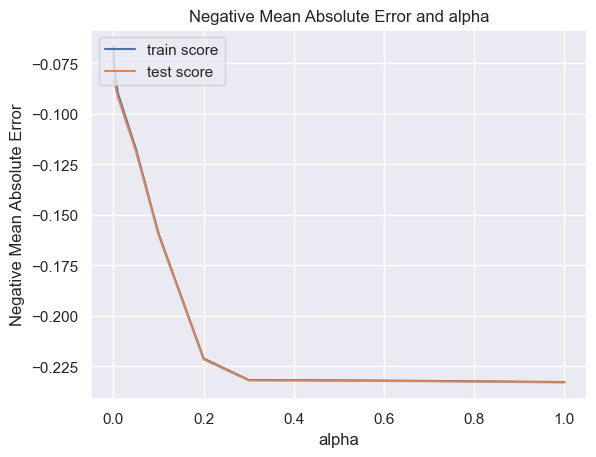

In [885]:
# Next needs to be plotted the mean test and train scores with alpha  
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [886]:
# The graph shows that where the alpha value is at 0.3, the negative mean absolute error
# is at its minimum. Next different values of alpha shoudl be checked

In [887]:
alpha = 0.001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)
lasso.coef_

array([-0.00971319,  0.01189933,  0.01961626,  0.08251734,  0.05820634,
        0.00066633,  0.03618587,  0.00442703,  0.03754559,  0.        ,
        0.        , -0.00217757,  0.12884658,  0.01313866, -0.        ,
        0.00506508,  0.00742487, -0.00278601, -0.00748254,  0.01057296,
        0.02792238,  0.01331381,  0.        ,  0.0101096 ,  0.00472972,
        0.01337765,  0.00889793, -0.00291763,  0.04419047,  0.        ,
        0.04817387, -0.        ,  0.        , -0.        , -0.00237819,
        0.        , -0.        ,  0.        ,  0.00160003, -0.        ,
       -0.        , -0.01850368,  0.        , -0.        , -0.        ,
       -0.        ,  0.02236992,  0.        , -0.        ,  0.0969003 ,
       -0.01265715, -0.        , -0.04692561, -0.        , -0.00464858,
        0.        ,  0.        , -0.        ,  0.        ,  0.0071628 ,
       -0.        , -0.        ,  0.        , -0.        ,  0.01387415,
        0.02826353, -0.        ,  0.        , -0.        ,  0.04

In [888]:
alpha = 0.01
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)
lasso.coef_

array([-8.36547597e-03,  1.34230978e-02,  1.57977071e-02,  1.01844364e-01,
        5.63299970e-02,  0.00000000e+00,  3.24931188e-02,  0.00000000e+00,
        4.12039767e-02,  1.19117765e-04,  0.00000000e+00, -0.00000000e+00,
        1.29065486e-01,  9.70855993e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -6.54573838e-03,  2.51708088e-02,
        3.01198566e-02,  7.52335474e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  6.07271474e-03,  0.00000000e+00, -3.89138519e-03,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -

In [889]:
alpha = 0.1
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)
lasso.coef_

array([-0.        ,  0.        ,  0.        ,  0.04088769,  0.        ,
        0.        ,  0.        ,  0.        ,  0.00763712,  0.        ,
        0.        , -0.        ,  0.10264245,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.00602679, -0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.  

In [890]:
alpha = 0.02
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)
lasso.coef_

array([-0.00151535,  0.01208168,  0.01125664,  0.09654272,  0.04794928,
        0.        ,  0.03163301,  0.        ,  0.04212169,  0.        ,
        0.        , -0.        ,  0.12346614,  0.00172844,  0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.0257586 ,
        0.02488612,  0.00073394,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.00413617,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.  

In [891]:
# At this stage it is necessary to set the Lasso Model Parameters

model_params = list(lasso.coef_ )
model_params.insert(0, lasso.intercept_)
model_params = [round(x, 3) for x in model_params]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_params))

[('constant', 12.154),
 ('MSSubClass', -0.002),
 ('LotFrontage', 0.012),
 ('LotArea', 0.011),
 ('OverallQual', 0.097),
 ('OverallCond', 0.048),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.032),
 ('BsmtFinSF2', 0.0),
 ('TotalBsmtSF', 0.042),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.123),
 ('BsmtFullBath', 0.002),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.0),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', -0.0),
 ('KitchenAbvGr', -0.0),
 ('Fireplaces', 0.026),
 ('GarageArea', 0.025),
 ('WoodDeckSF', 0.001),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', 0.0),
 ('age_property', -0.004),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', -0.0),
 ('MSZoning_RL', 0.0),
 ('MSZoning_RM', -0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', -0.0),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', 0.0),
 ('LandContour_Lvl', -0.0),
 ('LotConfig_CulDSac', 0.0),
 ('LotConfig_FR2', 0.0),
 ('LotConfig_FR3', -

In [892]:
# Next the Lasso regression can be performed

lm = Lasso(alpha=0.01)
lm.fit(X_train,y_train)

# Make predictions with the test set
# Compare the r2 scores
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))


0.8852986602638322
0.8937853852569423


In [893]:
# There is a good comparison between the two r2 scores

In [894]:
# The coefficients generated from the Lasso regression can be arranged
# in a dataframe

la_coef = list(zip(cols, model_params))
la_params = pd.DataFrame(la_coef)
la_params.columns = ['Variable', 'Coeff']
la_params.head()


Variable   Coeff
0     constant  12.154
1   MSSubClass  -0.002
2  LotFrontage   0.012
3      LotArea   0.011
4  OverallQual   0.097

In [895]:
la_params = la_params.sort_values((['Coeff']), axis=0, ascending=False)
la_params

Variable   Coeff
0                 constant  12.154
13               GrLivArea   0.123
4              OverallQual   0.097
5              OverallCond   0.048
9              TotalBsmtSF   0.042
..                     ...     ...
82       HouseStyle_1Story   0.000
83       HouseStyle_2.5Fin  -0.000
210  SaleCondition_Partial   0.000
1               MSSubClass  -0.002
28            age_property  -0.004

[211 rows x 2 columns]

In [896]:
# We are not interested in those coefficients which show zero

lasso_prediction = pd.DataFrame(la_params[(la_params['Coeff'] != 0)])
lasso_prediction

Variable   Coeff
0       constant  12.154
13     GrLivArea   0.123
4    OverallQual   0.097
5    OverallCond   0.048
9    TotalBsmtSF   0.042
7     BsmtFinSF1   0.032
20    Fireplaces   0.026
21    GarageArea   0.025
2    LotFrontage   0.012
3        LotArea   0.011
14  BsmtFullBath   0.002
22    WoodDeckSF   0.001
1     MSSubClass  -0.002
28  age_property  -0.004

In [897]:
# These variables, having been ibtained through LAsso Regression represent the variables
# with the most significant effect on the Sales PRice.

In [898]:
lasso_variables = list(lasso_prediction['Variable'])

In [899]:
X_train_lasso = X_train[['GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF1', 'Fireplaces', 'LotArea', 'LotFrontage', 'BsmtFullBath', 'Foundation_PConc', 'OpenPorchSF', 'FullBath', 'ScreenPorch', 'WoodDeckSF']]

In [900]:
X_test_lasso = X_test[['GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF1', 'Fireplaces', 'LotArea', 'LotFrontage', 'BsmtFullBath', 'Foundation_PConc', 'OpenPorchSF', 'FullBath', 'ScreenPorch', 'WoodDeckSF']]

In [901]:
X_train_lasso.head()

GrLivArea  OverallQual  OverallCond  TotalBsmtSF  GarageArea  \
11     1.923409     2.241710    -0.513939     0.345478    1.267298   
1070  -0.932170    -0.764271    -0.513939     0.030191   -0.857140   
513   -0.860557    -0.012775    -0.513939     0.119563    0.077613   
467    0.401627    -0.764271     1.258264    -0.764234   -0.734395   
993    0.079368    -0.012775    -0.513939    -0.709617    0.455291   

      BsmtFinSF1  Fireplaces   LotArea  LotFrontage  BsmtFullBath  \
11      1.323938    2.231812  0.154684     0.746261      1.131973   
1070    0.360916   -0.918240 -0.020017     0.130905      1.131973   
513    -0.223442   -0.918240 -0.115156     0.083570     -0.816345   
467    -0.106571    2.231812 -0.086269     0.462250     -0.816345   
993    -1.008820   -0.918240 -0.148775    -0.058435     -0.816345   

      Foundation_PConc  OpenPorchSF  FullBath  ScreenPorch  WoodDeckSF  
11                   1    -0.351334  2.754667    -0.268919    0.485675  
1070                 0    -0.368801 -0.990631     3.351363   -0.758474  
513                  1    -0.718144 -0.990631    -0.268919    0.257158  
467                  0    -0.718144 -0.990631    -0.268919    0.663411  
993                  1    -0.106794  0.882018    -0.268919   -0.758474

In [902]:
X_test_lasso.head()

GrLivArea  OverallQual  OverallCond  TotalBsmtSF  GarageArea  \
461   -0.813247     0.620334     3.325664    -1.205047    0.530538   
335    0.616745    -0.825989     0.435637     1.075768    0.299231   
200   -0.843999    -1.549150    -0.527705     0.157612   -0.138775   
214   -0.248718    -0.102827     1.398980    -0.891708   -0.832694   
1003   0.383905    -0.825989     0.435637     1.515413    0.294310   

      BsmtFinSF1  Fireplaces    LotArea  LotFrontage  BsmtFullBath  \
461    -0.211663   -0.988037  -0.339155    -0.495702      1.073876   
335     1.881258    2.151725  17.009026     0.729276      2.969732   
200    -1.026482   -0.988037  -0.190859     0.484280     -0.821980   
214    -0.146477   -0.988037   0.068493    -0.005711     -0.821980   
1003   -1.026482   -0.988037   0.134598     0.484280     -0.821980   

      Foundation_PConc  OpenPorchSF  FullBath  ScreenPorch  WoodDeckSF  
461                  1    -0.747921 -1.099305     -0.27671    1.165362  
335                  0    -0.747921  0.802316     -0.27671    4.227488  
200                  1     0.135073  0.802316     -0.27671    0.248203  
214                  0    -0.251236 -1.099305     -0.27671   -0.728127  
1003                 0    -0.747921  0.802316     -0.27671   -0.728127

In [903]:
# h. Apply Ridge Regression

In [904]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [905]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.009948      0.007111         0.006141        0.007158      0.0001   
1       0.005729      0.006143         0.000997        0.001995       0.001   
2       0.008806      0.006462         0.005717        0.004968        0.01   
3       0.009373      0.007653         0.003127        0.006253        0.05   
4       0.006247      0.007651         0.000000        0.000000         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.098827          -0.080586          -0.093923   
1   {'alpha': 0.001}          -0.098810          -0.080580          -0.093891   
2    {'alpha': 0.01}          -0.098639          -0.080523          -0.093591   
3    {'alpha': 0.05}          -0.097947          -0.080313          -0.092584   
4     {'alpha': 0.1}          -0.097203          -0.080128          -0.091737   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.093385          -0.081908        -0.089726        0.007190   
1          -0.093357          -0.081877        -0.089703        0.007188   
2          -0.093089          -0.081615        -0.089491        0.007154   
3          -0.092083          -0.081128        -0.088811        0.006923   
4          -0.091160          -0.080828        -0.088211        0.006661   

   rank_test_score  split0_train_score  split1_train_score  \
0               26           -0.063890           -0.066811   
1               25           -0.063891           -0.066811   
2               24           -0.063904           -0.066811   
3               23           -0.063979           -0.066830   
4               22           -0.064087           -0.066874   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.062901           -0.064702           -0.065821   
1           -0.062903           -0.064704           -0.065823   
2           -0.062931           -0.064715           -0.065846   
3           -0.063098           -0.064761           -0.065935   
4           -0.063300           -0.064817           -0.066042   

   mean_train_score  std_train_score  
0         -0.064825         0.001380  
1         -0.064826         0.001380  
2         -0.064841         0.001374  
3         -0.064921         0.001335  
4         -0.065024         0.001293

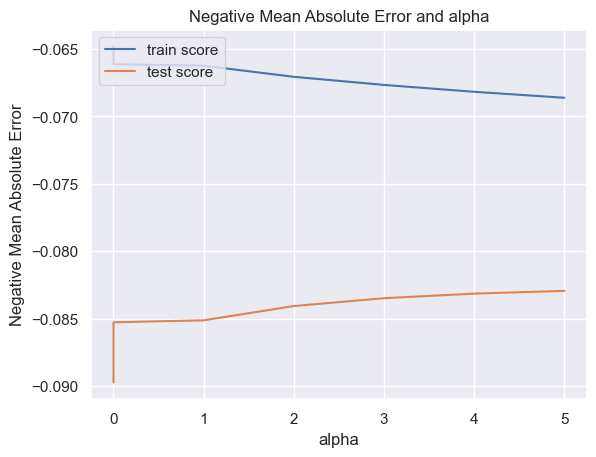

In [906]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [907]:
# The above graph of train score versus test score shows that an aloha value of 2
# should be selected

In [908]:
alpha = 2
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([-1.65841642e-02,  8.83598248e-03,  2.53949508e-02,  6.43686117e-02,
        5.14617149e-02, -1.66657649e-03,  3.05420716e-02,  7.50329812e-03,
        3.63613279e-02,  4.00498098e-02,  4.77108203e-02,  5.24793911e-03,
        7.60926819e-02,  1.17113572e-02, -9.10872532e-04,  8.80535240e-03,
        1.23776072e-02,  3.54007430e-04, -5.27648848e-03,  3.53695975e-03,
        2.07059841e-02,  1.34766256e-02, -1.02867962e-03,  1.24263993e-02,
        4.90865198e-03,  1.41631349e-02,  9.70595890e-03, -2.38013261e-03,
        1.48370386e-01,  1.05028694e-01,  1.24895948e-01,  9.68765736e-02,
        2.13215567e-03, -2.10043554e-02,  3.48828718e-04,  1.22052510e-02,
       -2.07187254e-02,  2.99199904e-03,  1.73986831e-02, -2.14615897e-02,
       -5.11727195e-02, -2.40173566e-02,  1.02599075e-02, -3.89229292e-02,
       -1.49266531e-02, -2.33287960e-02,  9.94570804e-03,  3.71198794e-02,
       -8.01448856e-03,  1.14551983e-01, -5.58115908e-02, -1.01494591e-02,
       -8.53782661e-02, -

In [909]:
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.83),
 ('MSSubClass', -0.017),
 ('LotFrontage', 0.009),
 ('LotArea', 0.025),
 ('OverallQual', 0.064),
 ('OverallCond', 0.051),
 ('MasVnrArea', -0.002),
 ('BsmtFinSF1', 0.031),
 ('BsmtFinSF2', 0.008),
 ('TotalBsmtSF', 0.036),
 ('1stFlrSF', 0.04),
 ('2ndFlrSF', 0.048),
 ('LowQualFinSF', 0.005),
 ('GrLivArea', 0.076),
 ('BsmtFullBath', 0.012),
 ('BsmtHalfBath', -0.001),
 ('FullBath', 0.009),
 ('HalfBath', 0.012),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', -0.005),
 ('Fireplaces', 0.004),
 ('GarageArea', 0.021),
 ('WoodDeckSF', 0.013),
 ('OpenPorchSF', -0.001),
 ('EnclosedPorch', 0.012),
 ('3SsnPorch', 0.005),
 ('ScreenPorch', 0.014),
 ('PoolArea', 0.01),
 ('age_property', -0.002),
 ('MSZoning_FV', 0.148),
 ('MSZoning_RH', 0.105),
 ('MSZoning_RL', 0.125),
 ('MSZoning_RM', 0.097),
 ('LotShape_IR2', 0.002),
 ('LotShape_IR3', -0.021),
 ('LotShape_Reg', 0.0),
 ('LandContour_HLS', 0.012),
 ('LandContour_Low', -0.021),
 ('LandContour_Lvl', 0.003),
 ('LotConfig_CulDSac', 0.017),
 (

In [910]:
lm = Ridge(alpha=2)
lm.fit(X_train, y_train)

# prediction
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9364547499765499
0.9106281303179798


In [911]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.11305786818560921


In [912]:
# Ridge regression is showing good comparison of r2 score

In [913]:
# A data frame containing the coefficients should be created

In [914]:
model_ridge = list(zip(cols, model_parameters))

In [915]:
paraRFE = pd.DataFrame(model_ridge)
paraRFE.columns = ['Variable', 'Coeff']
res=paraRFE.sort_values(by=['Coeff'], ascending = False)
res.head(20)

Variable   Coeff
0                 constant  11.830
29             MSZoning_FV   0.148
31             MSZoning_RL   0.125
50    Neighborhood_Crawfor   0.115
30             MSZoning_RH   0.105
32             MSZoning_RM   0.097
210  SaleCondition_Partial   0.097
66    Neighborhood_StoneBr   0.093
13               GrLivArea   0.076
209   SaleCondition_Normal   0.074
95     Exterior1st_BrkFace   0.069
136       Foundation_Stone   0.067
70         Condition1_Norm   0.066
4              OverallQual   0.064
206  SaleCondition_AdjLand   0.061
200         SaleType_ConLD   0.058
103     Exterior1st_Stucco   0.055
198           SaleType_CWD   0.054
124       MasVnrType_Stone   0.053
5              OverallCond   0.051

In [916]:
# These are the Ridge coefficients.
# We can sort them in descending order
paraRFE = paraRFE.sort_values((['Coeff']), axis = 0, ascending = False)
paraRFE

Variable   Coeff
0                constant  11.830
29            MSZoning_FV   0.148
31            MSZoning_RL   0.125
50   Neighborhood_Crawfor   0.115
30            MSZoning_RH   0.105
..                    ...     ...
173        KitchenQual_TA  -0.080
53    Neighborhood_IDOTRR  -0.085
94    Exterior1st_BrkComm  -0.096
83      HouseStyle_2.5Fin  -0.099
54   Neighborhood_MeadowV  -0.112

[211 rows x 2 columns]

In [917]:
# Remove the coefficients with zeros
predRFE = pd.DataFrame(paraRFE[(paraRFE['Coeff'] != 0)])
predRFE

Variable   Coeff
0                constant  11.830
29            MSZoning_FV   0.148
31            MSZoning_RL   0.125
50   Neighborhood_Crawfor   0.115
30            MSZoning_RH   0.105
..                    ...     ...
173        KitchenQual_TA  -0.080
53    Neighborhood_IDOTRR  -0.085
94    Exterior1st_BrkComm  -0.096
83      HouseStyle_2.5Fin  -0.099
54   Neighborhood_MeadowV  -0.112

[204 rows x 2 columns]

In [918]:
# Ridge regression does not apply zero values to features which are not considered
# significant. Lasso does drop these features(variables) with zero values.
# For this reason Lasso will be selected as the regression model.

In [919]:
# Apply coding to the features as follows:
lasso_prediction.set_index(pd.Index(['C','x1', 'x2', 'x3', 'x4', 'x5' , 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13']), inplace = True) 
lasso_prediction

Variable   Coeff
C        constant  12.154
x1      GrLivArea   0.123
x2    OverallQual   0.097
x3    OverallCond   0.048
x4    TotalBsmtSF   0.042
x5     BsmtFinSF1   0.032
x6     Fireplaces   0.026
x7     GarageArea   0.025
x8    LotFrontage   0.012
x9        LotArea   0.011
x10  BsmtFullBath   0.002
x11    WoodDeckSF   0.001
x12    MSSubClass  -0.002
x13  age_property  -0.004

In [920]:
# From this list of features or variables we can construct an equation 
# which predicts the price of a house as follows:

## Log(Y) = 12.154 + 0.123(x1) + 0.097(x2) + 0.048(x3) + 0.042(x4) + 0.032(x5) + 0.026(x6) + 0.025(x7) + 0.012(x8) + 0.011(x9) + 0.002(x10) + 0.001(x11) -0.002(x12) - 0.004(x13) + Error


### Conclusion

In [921]:
# The most important features are GrLivArea, OverallQual, overallCond, totalBsmtSF and GarageArea. 
# The predicted price tells us what is expected of the house price. If the actual market value shows a value
# which is lower than the predicted value - the property should be purchased.